In [393]:
import pandas as pd
import sqlite3
from pathlib import Path
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text

In [394]:
# reading csv into pandas dataframe
ny_data_csv = pd.read_csv("data/daily_data.csv")

ny_weather_df = pd.DataFrame(ny_data_csv)

# selecting columns used for analysis
ny_weather_clean_df  = ny_weather_df[["DATE", "DailyPeakWindDirection", "DailyPeakWindSpeed", "DailyPrecipitation", "DailySnowDepth", "DailySnowfall", "DailySustainedWindDirection", "DailySustainedWindSpeed", "DailyAverageDryBulbTemperature", "DailyMaximumDryBulbTemperature","DailyMinimumDryBulbTemperature"]]

ny_weather_clean_df

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0     2015-01-01T23:59:00                   190.0                26.0   
1     2015-01-02T23:59:00                   250.0                30.0   
2     2015-01-03T23:59:00                   170.0                21.0   
3     2015-01-04T23:59:00                   290.0                33.0   
4     2015-01-05T23:59:00                   280.0                42.0   
...                   ...                     ...                 ...   
2663  2022-05-27T23:59:00                   160.0                28.0   
2664  2022-05-28T23:59:00                   310.0                26.0   
2665  2022-05-29T23:59:00                    90.0                13.0   
2666  2022-05-30T23:59:00                   200.0                15.0   
2667  2022-05-31T23:59:00                   250.0                29.0   

     DailyPrecipitation DailySnowDepth DailySnowfall  \
0                  0.00            0.0           0.0   
1                     T            0.0             T   
2                  0.57            0.0           1.6   
3                  0.22            1.0           0.0   
4                     T            0.0             T   
...                 ...            ...           ...   
2663               0.00              0           0.0   
2664               0.04              0           0.0   
2665               0.00              0           0.0   
2666               0.00              0           0.0   
2667               0.00              0           0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
0                           190.0                     20.0   
1                           310.0                     23.0   
2                           160.0                     15.0   
3                           290.0                     24.0   
4                           290.0                     32.0   
...                           ...                      ...   
2663                        160.0                     21.0   
2664                        310.0                     22.0   
2665                        180.0                      9.0   
2666                        190.0                     12.0   
2667                        250.0                     21.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                               25.0                            32.0   
1                               32.0                            37.0   
2                               27.0                            33.0   
3                               39.0                            45.0   
4                               27.0                            41.0   
...                              ...                             ...   
2663                            70.0                            77.0   
2664                            68.0                            80.0   
2665                            66.0                            80.0   
2666                            72.0                            88.0   
2667                            79.0                            92.0   

      DailyMinimumDryBulbTemperature  
0                               18.0  
1                               26.0  
2                               20.0  
3                               33.0  
4                               13.0  
...                              ...  
2663                            63.0  
2664                            56.0  
2665                            51.0  
2666                            55.0  
2667                            65.0  

[2668 rows x 11 columns]

In [395]:
ny_weather_clean_df = ny_weather_clean_df.astype({"DATE": "datetime64[ns]"})

ny_weather_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            2668 non-null   datetime64[ns]
 1   DailyPeakWindDirection          2668 non-null   float64       
 2   DailyPeakWindSpeed              2668 non-null   float64       
 3   DailyPrecipitation              2668 non-null   object        
 4   DailySnowDepth                  2668 non-null   object        
 5   DailySnowfall                   2668 non-null   object        
 6   DailySustainedWindDirection     2668 non-null   float64       
 7   DailySustainedWindSpeed         2668 non-null   float64       
 8   DailyAverageDryBulbTemperature  2668 non-null   float64       
 9   DailyMaximumDryBulbTemperature  2668 non-null   float64       
 10  DailyMinimumDryBulbTemperature  2668 non-null   float64       
dtypes: d

In [396]:
ny_weather_clean_sorted_df = ny_weather_clean_df.sort_values(by=['DATE'])
ny_weather_clean_sorted_df.head(500)

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0   2015-01-01 23:59:00                   190.0                26.0   
1   2015-01-02 23:59:00                   250.0                30.0   
2   2015-01-03 23:59:00                   170.0                21.0   
3   2015-01-04 23:59:00                   290.0                33.0   
4   2015-01-05 23:59:00                   280.0                42.0   
..                  ...                     ...                 ...   
495 2016-06-08 23:59:00                   260.0                41.0   
496 2016-06-09 23:59:00                   300.0                39.0   
497 2016-06-10 23:59:00                   300.0                30.0   
498 2016-06-11 23:59:00                   100.0                14.0   
499 2016-06-12 23:59:00                   300.0                38.0   

    DailyPrecipitation DailySnowDepth DailySnowfall  \
0                 0.00            0.0           0.0   
1                    T            0.0             T   
2                 0.57            0.0           1.6   
3                 0.22            1.0           0.0   
4                    T            0.0             T   
..                 ...            ...           ...   
495                  T            0.0           0.0   
496               0.00            0.0           0.0   
497               0.00            0.0           0.0   
498               0.45            0.0           0.0   
499                  T            0.0           0.0   

     DailySustainedWindDirection  DailySustainedWindSpeed  \
0                          190.0                     20.0   
1                          310.0                     23.0   
2                          160.0                     15.0   
3                          290.0                     24.0   
4                          290.0                     32.0   
..                           ...                      ...   
495                        310.0                     30.0   
496                        300.0                     30.0   
497                        280.0                     22.0   
498                        220.0                     12.0   
499                        310.0                     28.0   

     DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                              25.0                            32.0   
1                              32.0                            37.0   
2                              27.0                            33.0   
3                              39.0                            45.0   
4                              27.0                            41.0   
..                              ...                             ...   
495                            59.0                            65.0   
496                            58.0                            65.0   
497                            61.0                            74.0   
498                            57.0                            68.0   
499                            61.0                            69.0   

     DailyMinimumDryBulbTemperature  
0                              18.0  
1                              26.0  
2                              20.0  
3                              33.0  
4                              13.0  
..                              ...  
495                            52.0  
496                            50.0  
497                            47.0  
498                            45.0  
499                            52.0  

[500 rows x 11 columns]

In [397]:
ny_weather_clean_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            2668 non-null   datetime64[ns]
 1   DailyPeakWindDirection          2668 non-null   float64       
 2   DailyPeakWindSpeed              2668 non-null   float64       
 3   DailyPrecipitation              2668 non-null   object        
 4   DailySnowDepth                  2668 non-null   object        
 5   DailySnowfall                   2668 non-null   object        
 6   DailySustainedWindDirection     2668 non-null   float64       
 7   DailySustainedWindSpeed         2668 non-null   float64       
 8   DailyAverageDryBulbTemperature  2668 non-null   float64       
 9   DailyMaximumDryBulbTemperature  2668 non-null   float64       
 10  DailyMinimumDryBulbTemperature  2668 non-null   float64       
dtypes: d

In [398]:
# Create a new column for 'Year' and 'Month' by extracting it from the 'Date' column

ny_weather_clean_sorted_df['Year'] = ny_weather_clean_sorted_df['DATE'].dt.year

ny_weather_clean_sorted_df['Month'] = ny_weather_clean_sorted_df['DATE'].dt.month

ny_weather_clean_sorted_df['Day'] = ny_weather_clean_sorted_df['DATE'].dt.day


ny_weather_clean_sorted_df

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0    2015-01-01 23:59:00                   190.0                26.0   
1    2015-01-02 23:59:00                   250.0                30.0   
2    2015-01-03 23:59:00                   170.0                21.0   
3    2015-01-04 23:59:00                   290.0                33.0   
4    2015-01-05 23:59:00                   280.0                42.0   
...                  ...                     ...                 ...   
2663 2022-05-27 23:59:00                   160.0                28.0   
2664 2022-05-28 23:59:00                   310.0                26.0   
2665 2022-05-29 23:59:00                    90.0                13.0   
2666 2022-05-30 23:59:00                   200.0                15.0   
2667 2022-05-31 23:59:00                   250.0                29.0   

     DailyPrecipitation DailySnowDepth DailySnowfall  \
0                  0.00            0.0           0.0   
1                     T            0.0             T   
2                  0.57            0.0           1.6   
3                  0.22            1.0           0.0   
4                     T            0.0             T   
...                 ...            ...           ...   
2663               0.00              0           0.0   
2664               0.04              0           0.0   
2665               0.00              0           0.0   
2666               0.00              0           0.0   
2667               0.00              0           0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
0                           190.0                     20.0   
1                           310.0                     23.0   
2                           160.0                     15.0   
3                           290.0                     24.0   
4                           290.0                     32.0   
...                           ...                      ...   
2663                        160.0                     21.0   
2664                        310.0                     22.0   
2665                        180.0                      9.0   
2666                        190.0                     12.0   
2667                        250.0                     21.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                               25.0                            32.0   
1                               32.0                            37.0   
2                               27.0                            33.0   
3                               39.0                            45.0   
4                               27.0                            41.0   
...                              ...                             ...   
2663                            70.0                            77.0   
2664                            68.0                            80.0   
2665                            66.0                            80.0   
2666                            72.0                            88.0   
2667                            79.0                            92.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
0                               18.0  2015      1    1  
1                               26.0  2015      1    2  
2                               20.0  2015      1    3  
3                               33.0  2015      1    4  
4                               13.0  2015      1    5  
...                              ...   ...    ...  ...  
2663                            63.0  2022      5   27  
2664                            56.0  2022      5   28  
2665                            51.0  2022      5   29  
2666                            55.0  2022      5   30  
2667                            65.0  2022      5   31  

[2668 rows x 14 columns]

In [399]:
# replacing the T (trace value) with 0
ny_weather_clean_sorted_df["DailyPrecipitation"] = ny_weather_clean_sorted_df["DailyPrecipitation"].replace("T", "0.0")
ny_weather_clean_sorted_df["DailySnowfall"] = ny_weather_clean_sorted_df["DailySnowfall"].replace("T", "0.0")
ny_weather_clean_sorted_df["DailySnowDepth"] = ny_weather_clean_sorted_df["DailySnowDepth"].replace("T", "0.0")

ny_weather_clean_sorted_df

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0    2015-01-01 23:59:00                   190.0                26.0   
1    2015-01-02 23:59:00                   250.0                30.0   
2    2015-01-03 23:59:00                   170.0                21.0   
3    2015-01-04 23:59:00                   290.0                33.0   
4    2015-01-05 23:59:00                   280.0                42.0   
...                  ...                     ...                 ...   
2663 2022-05-27 23:59:00                   160.0                28.0   
2664 2022-05-28 23:59:00                   310.0                26.0   
2665 2022-05-29 23:59:00                    90.0                13.0   
2666 2022-05-30 23:59:00                   200.0                15.0   
2667 2022-05-31 23:59:00                   250.0                29.0   

     DailyPrecipitation DailySnowDepth DailySnowfall  \
0                  0.00            0.0           0.0   
1                   0.0            0.0           0.0   
2                  0.57            0.0           1.6   
3                  0.22            1.0           0.0   
4                   0.0            0.0           0.0   
...                 ...            ...           ...   
2663               0.00              0           0.0   
2664               0.04              0           0.0   
2665               0.00              0           0.0   
2666               0.00              0           0.0   
2667               0.00              0           0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
0                           190.0                     20.0   
1                           310.0                     23.0   
2                           160.0                     15.0   
3                           290.0                     24.0   
4                           290.0                     32.0   
...                           ...                      ...   
2663                        160.0                     21.0   
2664                        310.0                     22.0   
2665                        180.0                      9.0   
2666                        190.0                     12.0   
2667                        250.0                     21.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                               25.0                            32.0   
1                               32.0                            37.0   
2                               27.0                            33.0   
3                               39.0                            45.0   
4                               27.0                            41.0   
...                              ...                             ...   
2663                            70.0                            77.0   
2664                            68.0                            80.0   
2665                            66.0                            80.0   
2666                            72.0                            88.0   
2667                            79.0                            92.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
0                               18.0  2015      1    1  
1                               26.0  2015      1    2  
2                               20.0  2015      1    3  
3                               33.0  2015      1    4  
4                               13.0  2015      1    5  
...                              ...   ...    ...  ...  
2663                            63.0  2022      5   27  
2664                            56.0  2022      5   28  
2665                            51.0  2022      5   29  
2666                            55.0  2022      5   30  
2667                            65.0  2022      5   31  

[2668 rows x 14 columns]

In [400]:
ny_weather_clean_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            2668 non-null   datetime64[ns]
 1   DailyPeakWindDirection          2668 non-null   float64       
 2   DailyPeakWindSpeed              2668 non-null   float64       
 3   DailyPrecipitation              2668 non-null   object        
 4   DailySnowDepth                  2668 non-null   object        
 5   DailySnowfall                   2668 non-null   object        
 6   DailySustainedWindDirection     2668 non-null   float64       
 7   DailySustainedWindSpeed         2668 non-null   float64       
 8   DailyAverageDryBulbTemperature  2668 non-null   float64       
 9   DailyMaximumDryBulbTemperature  2668 non-null   float64       
 10  DailyMinimumDryBulbTemperature  2668 non-null   float64       
 11  Year

In [401]:
ny_weather_clean_sorted_df = ny_weather_clean_sorted_df.astype({"DailyPrecipitation": "float", "DailySnowDepth": "float", "DailySnowfall": "float"})

ny_weather_clean_sorted_df.to_csv('ny_weather_clean.csv', index=False)



In [402]:
conn = sqlite3.connect('data/daily_data.db')
ny_weather_clean_sorted_df.to_sql('new_york_weather', conn, if_exists='replace', index=False)

query = ('SELECT * FROM new_york_weather')

ny_weather_clean_sorted_df = pd.read_sql(query, conn)

ny_weather_clean_sorted_df


DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0     2015-01-01 23:59:00                   190.0                26.0   
1     2015-01-02 23:59:00                   250.0                30.0   
2     2015-01-03 23:59:00                   170.0                21.0   
3     2015-01-04 23:59:00                   290.0                33.0   
4     2015-01-05 23:59:00                   280.0                42.0   
...                   ...                     ...                 ...   
2663  2022-05-27 23:59:00                   160.0                28.0   
2664  2022-05-28 23:59:00                   310.0                26.0   
2665  2022-05-29 23:59:00                    90.0                13.0   
2666  2022-05-30 23:59:00                   200.0                15.0   
2667  2022-05-31 23:59:00                   250.0                29.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
0                   0.00             0.0            0.0   
1                   0.00             0.0            0.0   
2                   0.57             0.0            1.6   
3                   0.22             1.0            0.0   
4                   0.00             0.0            0.0   
...                  ...             ...            ...   
2663                0.00             0.0            0.0   
2664                0.04             0.0            0.0   
2665                0.00             0.0            0.0   
2666                0.00             0.0            0.0   
2667                0.00             0.0            0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
0                           190.0                     20.0   
1                           310.0                     23.0   
2                           160.0                     15.0   
3                           290.0                     24.0   
4                           290.0                     32.0   
...                           ...                      ...   
2663                        160.0                     21.0   
2664                        310.0                     22.0   
2665                        180.0                      9.0   
2666                        190.0                     12.0   
2667                        250.0                     21.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                               25.0                            32.0   
1                               32.0                            37.0   
2                               27.0                            33.0   
3                               39.0                            45.0   
4                               27.0                            41.0   
...                              ...                             ...   
2663                            70.0                            77.0   
2664                            68.0                            80.0   
2665                            66.0                            80.0   
2666                            72.0                            88.0   
2667                            79.0                            92.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
0                               18.0  2015      1    1  
1                               26.0  2015      1    2  
2                               20.0  2015      1    3  
3                               33.0  2015      1    4  
4                               13.0  2015      1    5  
...                              ...   ...    ...  ...  
2663                            63.0  2022      5   27  
2664                            56.0  2022      5   28  
2665                            51.0  2022      5   29  
2666                            55.0  2022      5   30  
2667                            65.0  2022      5   31  

[2668 rows x 14 columns]

In [403]:
# grouping dataframe by Month and Year
ny_weather_clean_group_df = ny_weather_clean_sorted_df.groupby(["Month", "Year"])

# calculating the mean values of the columns for each month and year
avg_groupby = ny_weather_clean_group_df[['DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall', 'DailyAverageDryBulbTemperature', 'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature']].mean()

avg_groupby


DailyPrecipitation  DailySnowDepth  DailySnowfall  \
Month Year                                                      
1     2015            0.070000        1.322581       0.500000   
      2016            0.040000        0.064516       0.106452   
      2017            0.100968        0.258065       0.148387   
      2018            0.077097        2.096774       0.412903   
      2019            0.143000        2.466667       0.630000   
...                        ...             ...            ...   
12    2017            0.062258        1.419355       0.390323   
      2018            0.098065        0.064516       0.106452   
      2019            0.146452        3.709677       0.900000   
      2020            0.119355        3.677419       0.845161   
      2021            0.085484        0.129032       0.132258   

            DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
1     2015                       19.903226                       28.903226   
      2016                       27.967742                       36.000000   
      2017                       30.806452                       37.096774   
      2018                       23.548387                       31.741935   
      2019                       23.800000                       32.266667   
...                                    ...                             ...   
12    2017                       25.032258                       32.161290   
      2018                       32.612903                       40.032258   
      2019                       30.000000                       36.903226   
      2020                       30.193548                       37.161290   
      2021                       36.354839                       42.838710   

            DailyMinimumDryBulbTemperature  
Month Year                                  
1     2015                       10.451613  
      2016                       19.483871  
      2017                       24.032258  
      2018                       14.774194  
      2019                       14.933333  
...                                    ...  
12    2017                       17.483871  
      2018                       24.709677  
      2019                       22.677419  
      2020                       22.612903  
      2021                       29.387097  

[88 rows x 6 columns]

In [404]:
#Sophie starts below 

# filtering for jan data
jan_avg = avg_groupby.iloc[0:8, 0:3]
jan_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
1     2015            0.070000        1.322581       0.500000
      2016            0.040000        0.064516       0.106452
      2017            0.100968        0.258065       0.148387
      2018            0.077097        2.096774       0.412903
      2019            0.143000        2.466667       0.630000
      2020            0.064839        0.387097       0.164516
      2021            0.059677        0.774194       0.390323
      2022            0.041290        1.387097       0.267742

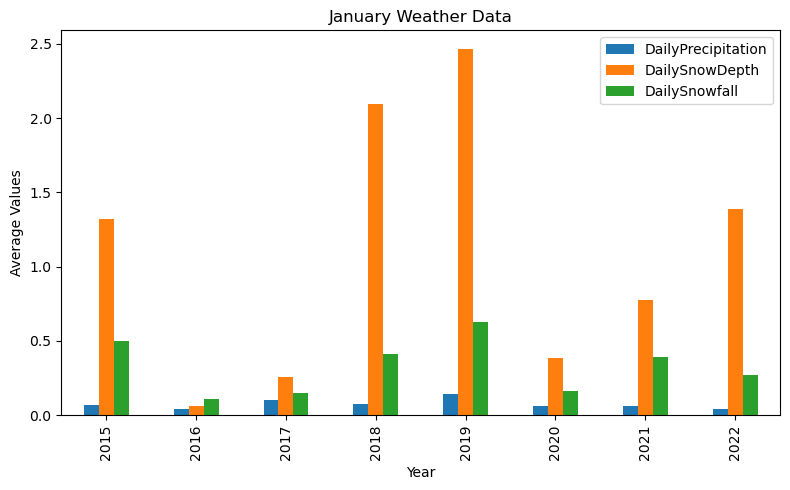

In [405]:
jan_plot = jan_avg.plot(kind='bar', figsize = (8,5))

# Extract the year from the index
years = [index[1] for index in jan_avg.index]  

jan_plot.set_xticklabels(years)

jan_plot.set_title('January Weather Data')
jan_plot.set_xlabel('Year')
jan_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [406]:
feb_avg = avg_groupby.iloc[8:15, 0:3]

feb_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
2     2016            0.140345        0.241379       0.165517
      2017            0.105556        3.185185       0.822222
      2018            0.110000        1.607143       0.500000
      2019            0.095714        2.500000       0.503571
      2020            0.093448        0.586207       0.241379
      2021            0.063571        5.214286       0.492857
      2022            0.098929        1.750000       0.382143

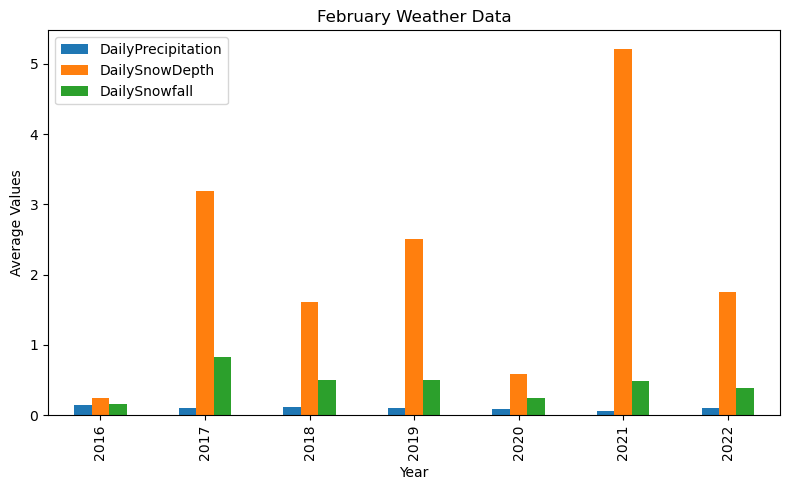

In [407]:
feb_plot = feb_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in feb_avg.index]  

feb_plot.set_xticklabels(years)

feb_plot.set_title('February Weather Data')
feb_plot.set_xlabel('Year')
feb_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [408]:
mar_avg = avg_groupby.iloc[15:23, 0:3]
mar_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
3     2015            0.040323        3.838710       0.170968
      2016            0.038065        0.000000       0.006452
      2017            0.128333        3.200000       0.643333
      2018            0.098710        5.225806       1.161290
      2019            0.045000        1.366667       0.206667
      2020            0.094516        0.193548       0.206452
      2021            0.057742        0.032258       0.025806
      2022            0.108065        0.838710       0.293548

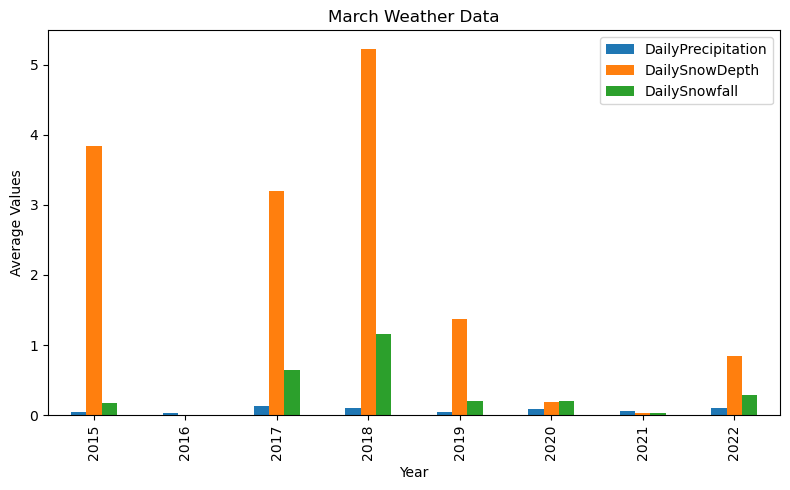

In [409]:
mar_plot = mar_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in mar_avg.index]  

mar_plot.set_xticklabels(years)

mar_plot.set_title('March Weather Data')
mar_plot.set_xlabel('Year')
mar_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [410]:
apr_avg = avg_groupby.iloc[23:31, 0:3]
apr_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
4     2015            0.070000        0.000000       0.000000
      2016            0.061333        0.266667       0.213333
      2017            0.096000        0.000000       0.006667
      2018            0.139000        0.066667       0.080000
      2019            0.144000        0.033333       0.070000
      2020            0.104000        0.000000       0.033333
      2021            0.130667        0.000000       0.016667
      2022            0.166667        0.100000       0.093333

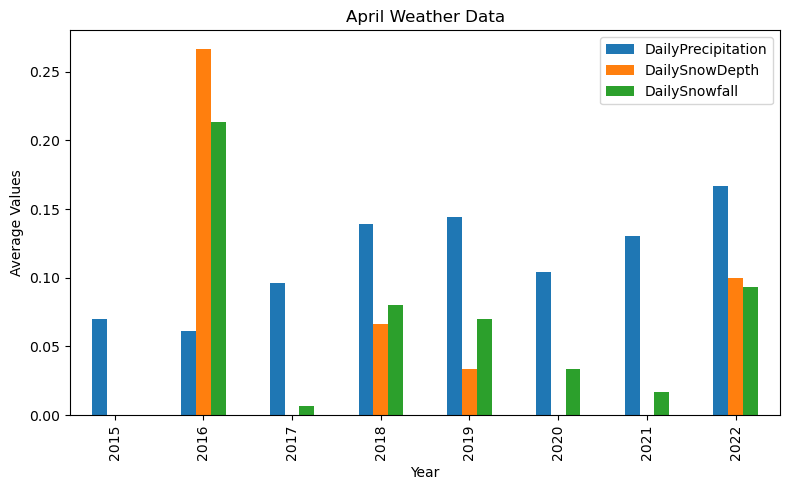

In [411]:
apr_plot = apr_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in apr_avg.index] 

apr_plot.set_xticklabels(years)

apr_plot.set_title('April Weather Data')
apr_plot.set_xlabel('Year')
apr_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [412]:
may_avg = avg_groupby.iloc[31:39, 0:3]
may_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
5     2015            0.033871             0.0            0.0
      2016            0.078387             0.0            0.0
      2017            0.192903             0.0            0.0
      2018            0.052903             0.0            0.0
      2019            0.099355             0.0            0.0
      2020            0.049032             0.0            0.0
      2021            0.099032             0.0            0.0
      2022            0.059677             0.0            0.0

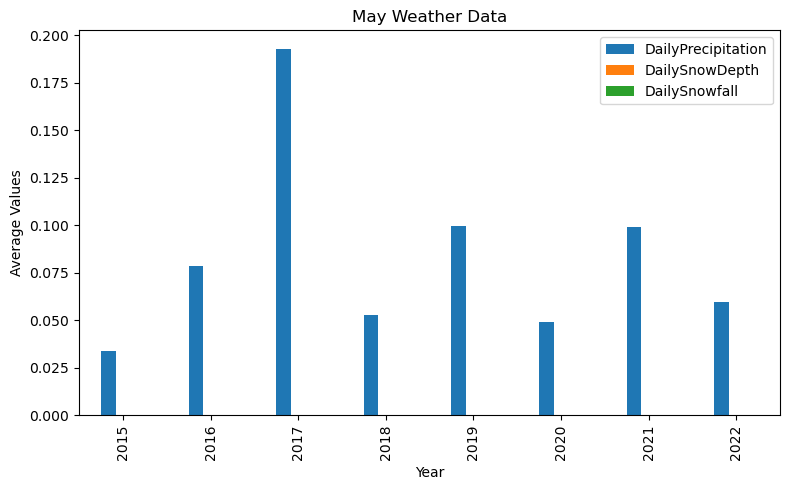

In [413]:
may_plot = may_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in may_avg.index]  

may_plot.set_xticklabels(years)

may_plot.set_title('May Weather Data')
may_plot.set_xlabel('Year')
may_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [414]:
june_avg = avg_groupby.iloc[39:46, 0:3]
june_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
6     2015            0.223333             0.0            0.0
      2016            0.077000             0.0            0.0
      2017            0.170667             0.0            0.0
      2018            0.103448             0.0            0.0
      2019            0.171667             0.0            0.0
      2020            0.066000             0.0            0.0
      2021            0.090000             0.0            0.0

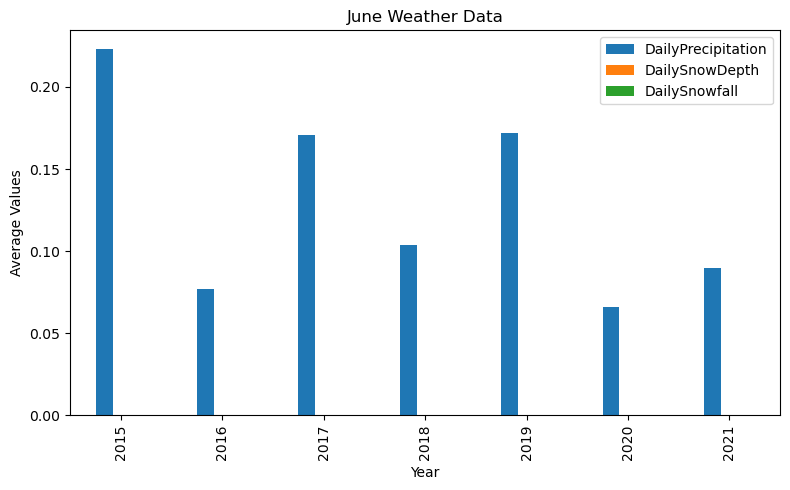

In [415]:
june_plot = june_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in june_avg.index]  # Extract the year from the index

june_plot.set_xticklabels(years)

june_plot.set_title('June Weather Data')
june_plot.set_xlabel('Year')
june_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [416]:
july_avg = avg_groupby.iloc[46:53, 0:3]
july_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
7     2015            0.110323             0.0            0.0
      2016            0.214667             0.0            0.0
      2017            0.129355             0.0            0.0
      2018            0.157333             0.0            0.0
      2019            0.137586             0.0            0.0
      2020            0.115161             0.0            0.0
      2021            0.289032             0.0            0.0

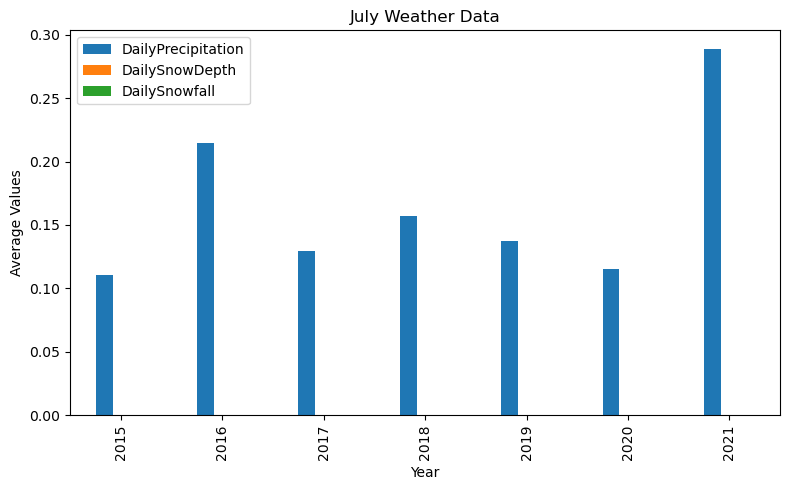

In [417]:
july_plot = july_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in july_avg.index]  # Extract the year from the index

july_plot.set_xticklabels(years)

july_plot.set_title('July Weather Data')
july_plot.set_xlabel('Year')
july_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [418]:
aug_avg = avg_groupby.iloc[53:60, 0:3]
aug_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
8     2015            0.143333             0.0            0.0
      2016            0.127097             0.0            0.0
      2017            0.121290             0.0            0.0
      2018            0.135484             0.0            0.0
      2019            0.132903             0.0            0.0
      2020            0.195806             0.0            0.0
      2021            0.110645             0.0            0.0

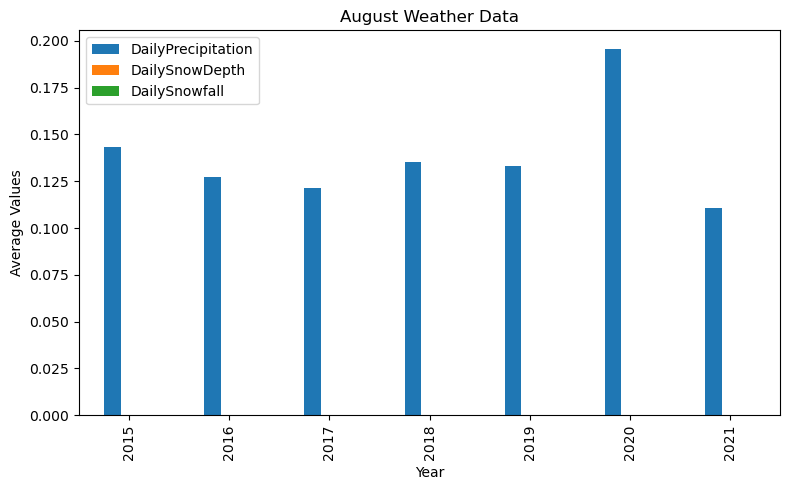

In [419]:
aug_plot = aug_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in aug_avg.index]  # Extract the year from the index

aug_plot.set_xticklabels(years)

aug_plot.set_title('August Weather Data')
aug_plot.set_xlabel('Year')
aug_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [420]:
sept_avg = avg_groupby.iloc[60:67, 0:3]
sept_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
9     2015            0.229667             0.0            0.0
      2016            0.072667             0.0            0.0
      2017            0.091000             0.0            0.0
      2018            0.187333             0.0            0.0
      2019            0.074333             0.0            0.0
      2020            0.087667             0.0            0.0
      2021            0.191333             0.0            0.0

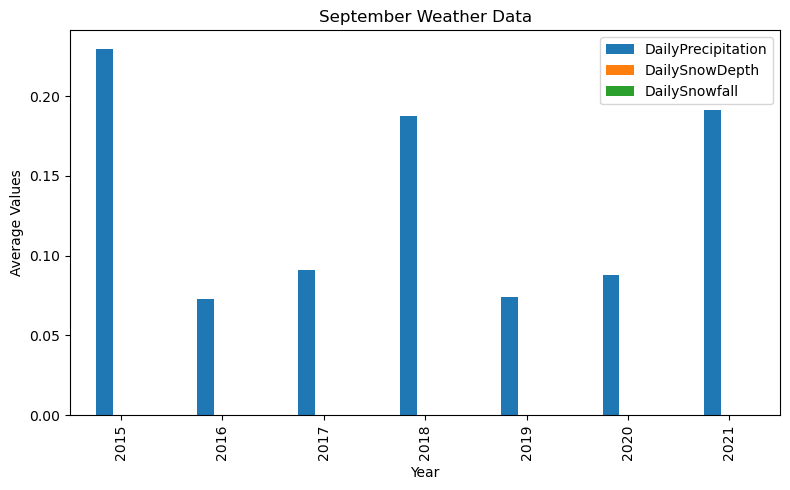

In [421]:
sept_plot = sept_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in sept_avg.index]  # Extract the year from the index

sept_plot.set_xticklabels(years)

sept_plot.set_title('September Weather Data')
sept_plot.set_xlabel('Year')
sept_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [422]:
oct_avg = avg_groupby.iloc[67:74, 0:3]
oct_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
10    2015            0.103226        0.000000       0.000000
      2016            0.096667        0.033333       0.056667
      2017            0.090323        0.000000       0.000000
      2018            0.121613        0.000000       0.000000
      2019            0.241290        0.000000       0.000000
      2020            0.100968        0.032258       0.038710
      2021            0.231613        0.000000       0.000000

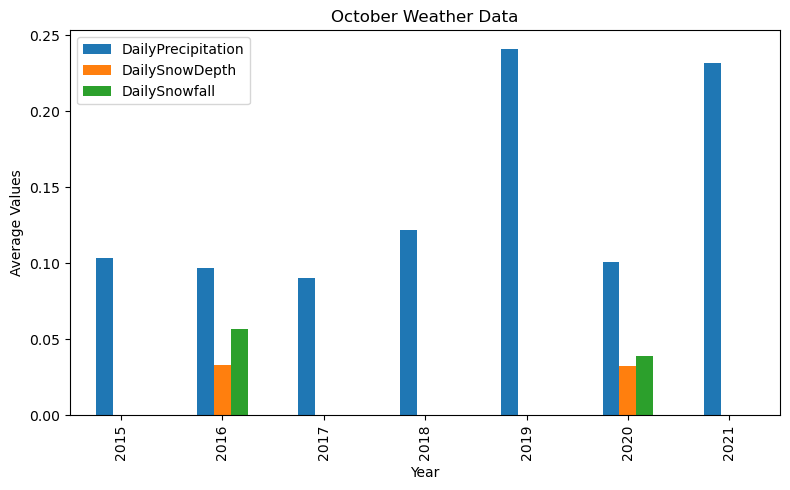

In [423]:
oct_plot = oct_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in oct_avg.index]  # Extract the year from the index

oct_plot.set_xticklabels(years)

oct_plot.set_title('October Weather Data')
oct_plot.set_xlabel('Year')
oct_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [424]:
nov_avg = avg_groupby.iloc[74:81, 0:3]
nov_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
11    2015            0.058333        0.000000       0.000000
      2016            0.098966        0.000000       0.020690
      2017            0.030000        0.000000       0.000000
      2018            0.186333        0.666667       0.346667
      2019            0.094000        0.133333       0.076667
      2020            0.123000        0.000000       0.000000
      2021            0.076333        0.033333       0.046667

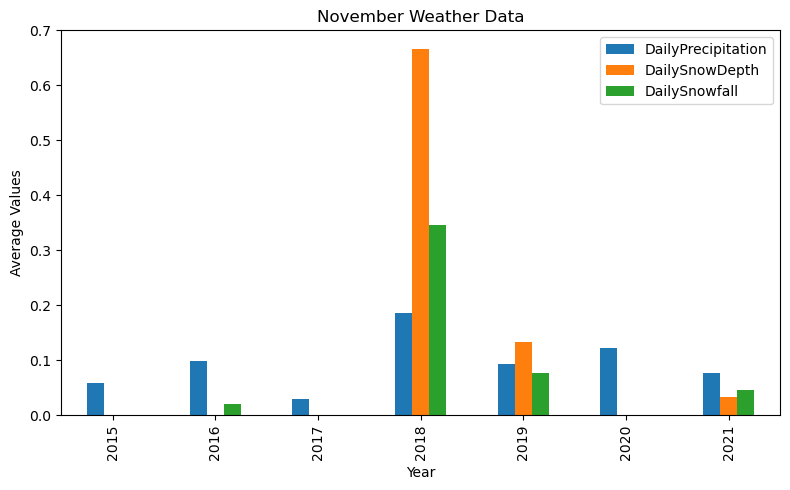

In [425]:
nov_plot = nov_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in nov_avg.index]  # Extract the year from the index

nov_plot.set_xticklabels(years)

nov_plot.set_title('November Weather Data')
nov_plot.set_xlabel('Year')
nov_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [426]:
dec_avg = avg_groupby.iloc[81:88, 0:3]
dec_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
12    2015            0.118387        0.161290       0.070968
      2016            0.056452        0.451613       0.390323
      2017            0.062258        1.419355       0.390323
      2018            0.098065        0.064516       0.106452
      2019            0.146452        3.709677       0.900000
      2020            0.119355        3.677419       0.845161
      2021            0.085484        0.129032       0.132258

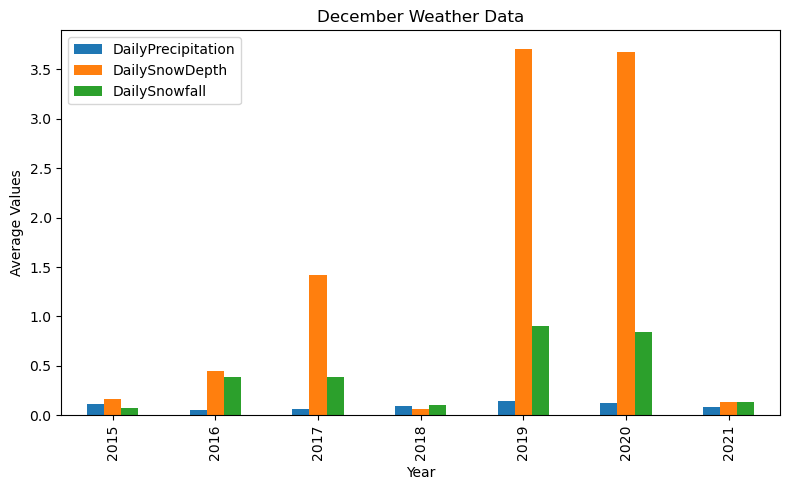

In [427]:
dec_plot = dec_avg.plot(kind='bar', figsize = (8,5))

years = [index[1] for index in dec_avg.index]  # Extract the year from the index

dec_plot.set_xticklabels(years)

dec_plot.set_title('December Weather Data')
dec_plot.set_xlabel('Year')
dec_plot.set_ylabel('Average Values')

plt.tight_layout()
plt.show()

In [428]:
# Connor Starts below

In [429]:
# grouping dataframe by Month and Year
ny_weather_clean_group_df = ny_weather_clean_sorted_df.groupby(["Month", "Year"])

# calculating the mean values of the columns for each month and year
avg_groupby = ny_weather_clean_group_df[['DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall', 'DailyAverageDryBulbTemperature', 'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature']].mean()

avg_groupby

DailyPrecipitation  DailySnowDepth  DailySnowfall  \
Month Year                                                      
1     2015            0.070000        1.322581       0.500000   
      2016            0.040000        0.064516       0.106452   
      2017            0.100968        0.258065       0.148387   
      2018            0.077097        2.096774       0.412903   
      2019            0.143000        2.466667       0.630000   
...                        ...             ...            ...   
12    2017            0.062258        1.419355       0.390323   
      2018            0.098065        0.064516       0.106452   
      2019            0.146452        3.709677       0.900000   
      2020            0.119355        3.677419       0.845161   
      2021            0.085484        0.129032       0.132258   

            DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
1     2015                       19.903226                       28.903226   
      2016                       27.967742                       36.000000   
      2017                       30.806452                       37.096774   
      2018                       23.548387                       31.741935   
      2019                       23.800000                       32.266667   
...                                    ...                             ...   
12    2017                       25.032258                       32.161290   
      2018                       32.612903                       40.032258   
      2019                       30.000000                       36.903226   
      2020                       30.193548                       37.161290   
      2021                       36.354839                       42.838710   

            DailyMinimumDryBulbTemperature  
Month Year                                  
1     2015                       10.451613  
      2016                       19.483871  
      2017                       24.032258  
      2018                       14.774194  
      2019                       14.933333  
...                                    ...  
12    2017                       17.483871  
      2018                       24.709677  
      2019                       22.677419  
      2020                       22.612903  
      2021                       29.387097  

[88 rows x 6 columns]

In [430]:

# filtering for jan data
jan_avg = avg_groupby.iloc[0:8, 0:3]
jan_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
1     2015            0.070000        1.322581       0.500000
      2016            0.040000        0.064516       0.106452
      2017            0.100968        0.258065       0.148387
      2018            0.077097        2.096774       0.412903
      2019            0.143000        2.466667       0.630000
      2020            0.064839        0.387097       0.164516
      2021            0.059677        0.774194       0.390323
      2022            0.041290        1.387097       0.267742

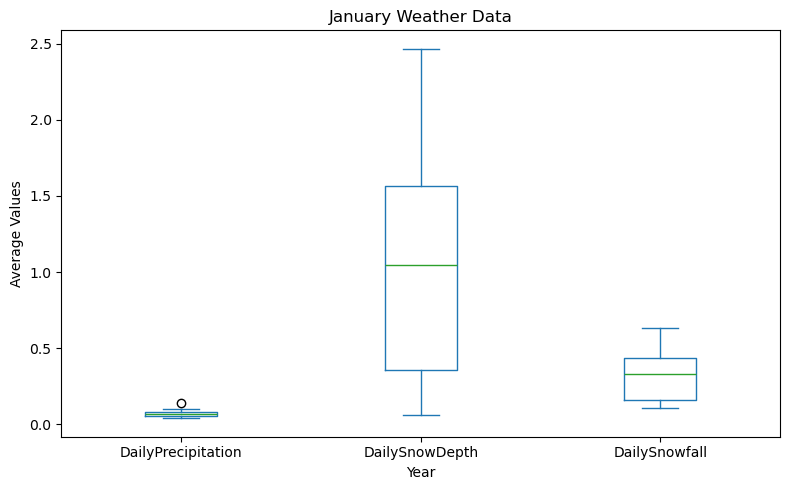

In [431]:

# Extract the year from the index if applicable
jan_box_plot = jan_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
jan_box_plot.set_title('January Weather Data')
jan_box_plot.set_xlabel('Year')
jan_box_plot.set_ylabel('Average Values')

plt.tight_layout()


In [432]:
feb_avg = avg_groupby.iloc[8:15, 0:3]

feb_avg

DailyPrecipitation  DailySnowDepth  DailySnowfall
Month Year                                                   
2     2016            0.140345        0.241379       0.165517
      2017            0.105556        3.185185       0.822222
      2018            0.110000        1.607143       0.500000
      2019            0.095714        2.500000       0.503571
      2020            0.093448        0.586207       0.241379
      2021            0.063571        5.214286       0.492857
      2022            0.098929        1.750000       0.382143

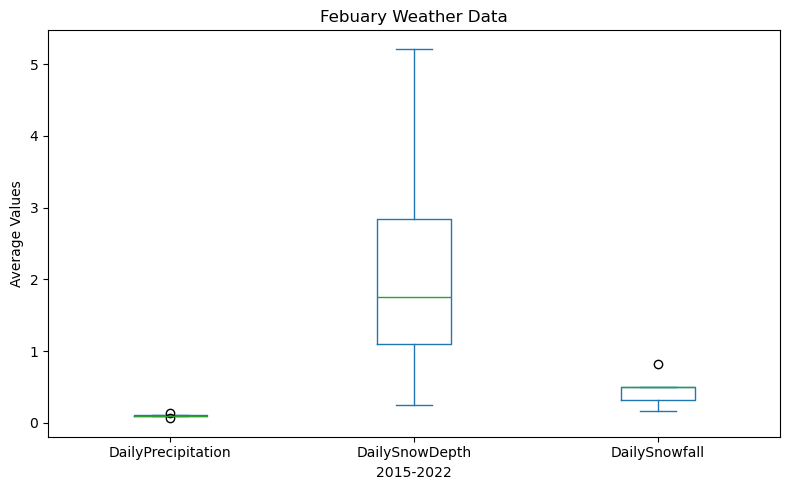

In [433]:
feb_box_plot = feb_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
feb_box_plot.set_title('Febuary Weather Data')
feb_box_plot.set_xlabel('2015-2022')
feb_box_plot.set_ylabel('Average Values')

plt.tight_layout()

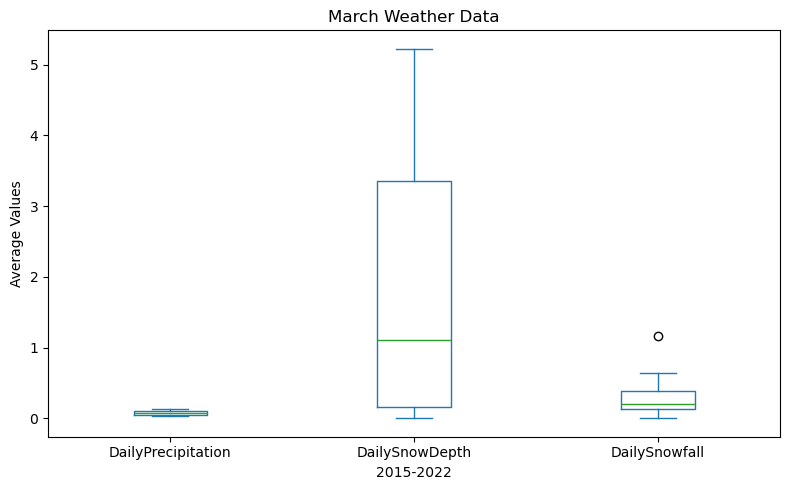

In [434]:
march_box_plot = mar_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
march_box_plot.set_title('March Weather Data')
march_box_plot.set_xlabel('2015-2022')
march_box_plot.set_ylabel('Average Values')

plt.tight_layout()

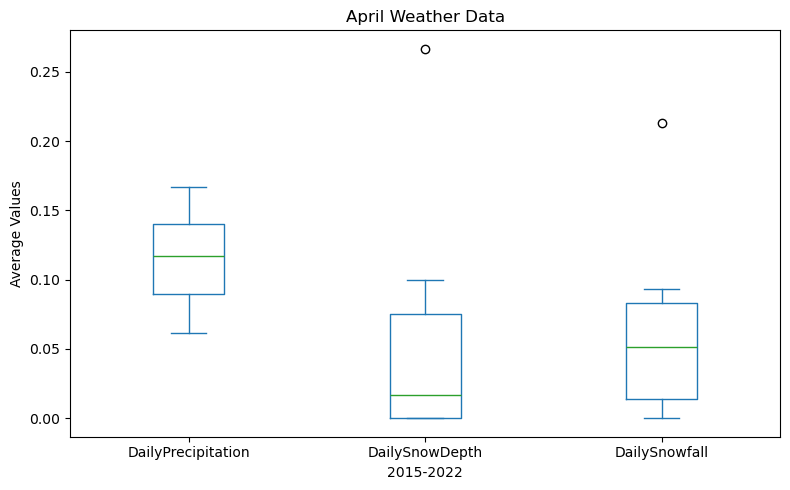

In [435]:
april_box_plot = apr_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
april_box_plot.set_title('April Weather Data')
april_box_plot.set_xlabel('2015-2022')
april_box_plot.set_ylabel('Average Values')

plt.tight_layout()

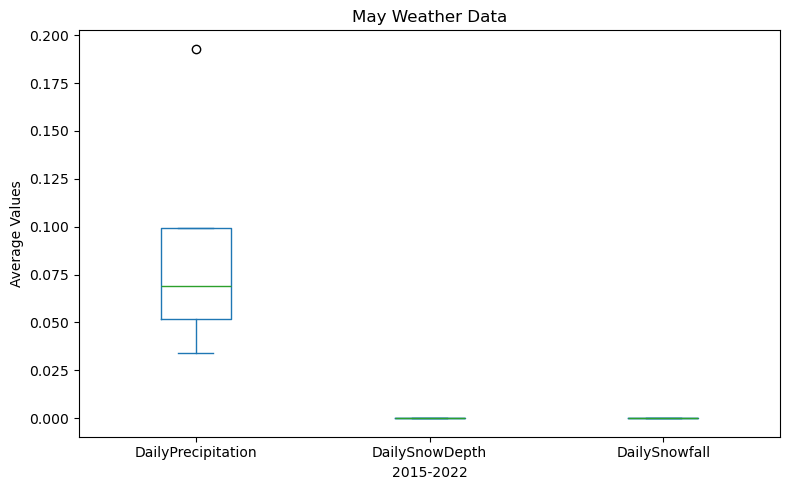

In [436]:
may_box_plot = may_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
may_box_plot.set_title('May Weather Data')
may_box_plot.set_xlabel('2015-2022')
may_box_plot.set_ylabel('Average Values')

plt.tight_layout()

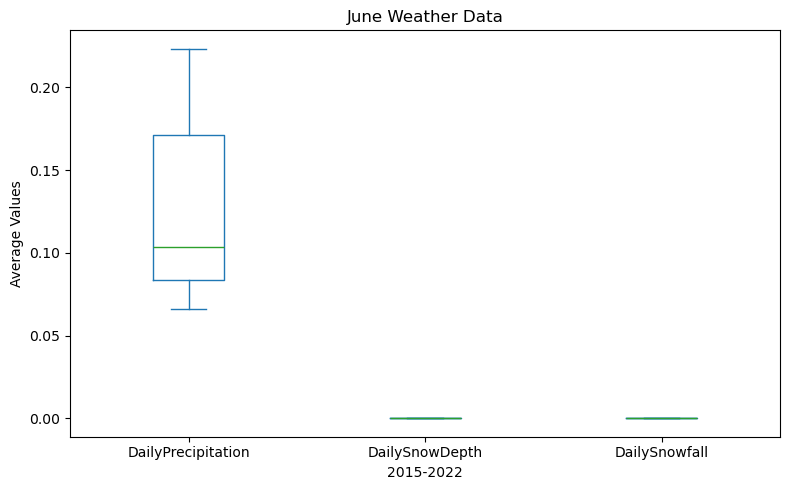

In [437]:
june_box_plot = june_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
june_box_plot.set_title('June Weather Data')
june_box_plot.set_xlabel('2015-2022')
june_box_plot.set_ylabel('Average Values')

plt.tight_layout()

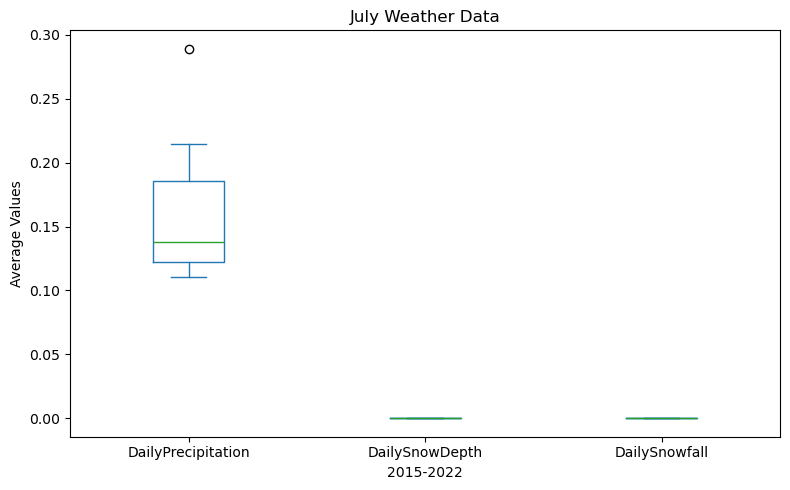

In [438]:
july_box_plot = july_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
july_box_plot.set_title('July Weather Data')
july_box_plot.set_xlabel('2015-2022')
july_box_plot.set_ylabel('Average Values')

plt.tight_layout()

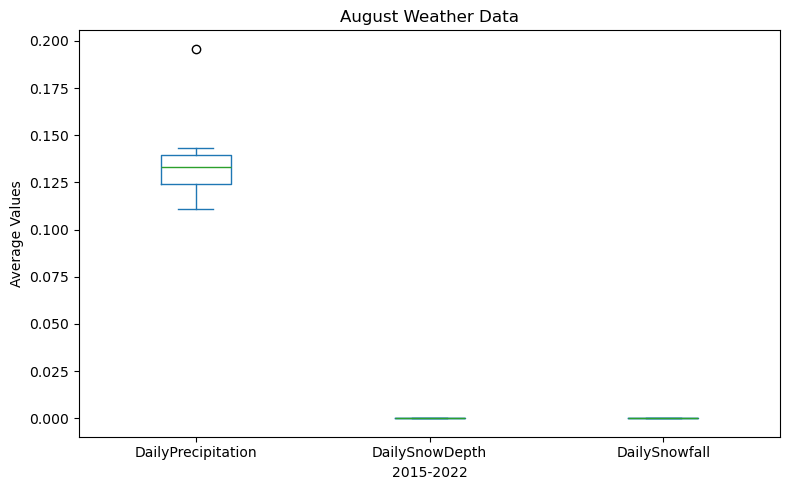

In [439]:
august_box_plot = aug_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
august_box_plot.set_title('August Weather Data')
august_box_plot.set_xlabel('2015-2022')
august_box_plot.set_ylabel('Average Values')

plt.tight_layout()

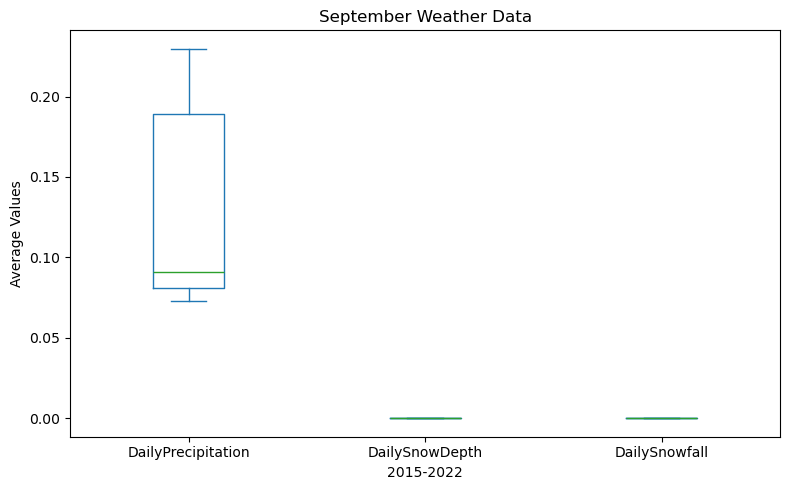

In [440]:
september_box_plot = sept_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
september_box_plot.set_title('September Weather Data')
september_box_plot.set_xlabel('2015-2022')
september_box_plot.set_ylabel('Average Values')

plt.tight_layout()

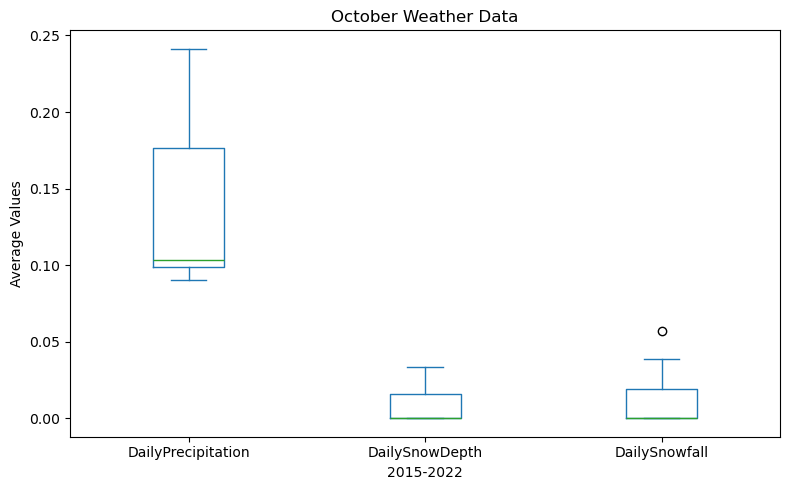

In [441]:
october_box_plot = oct_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
october_box_plot.set_title('October Weather Data')
october_box_plot.set_xlabel('2015-2022')
october_box_plot.set_ylabel('Average Values')

plt.tight_layout()

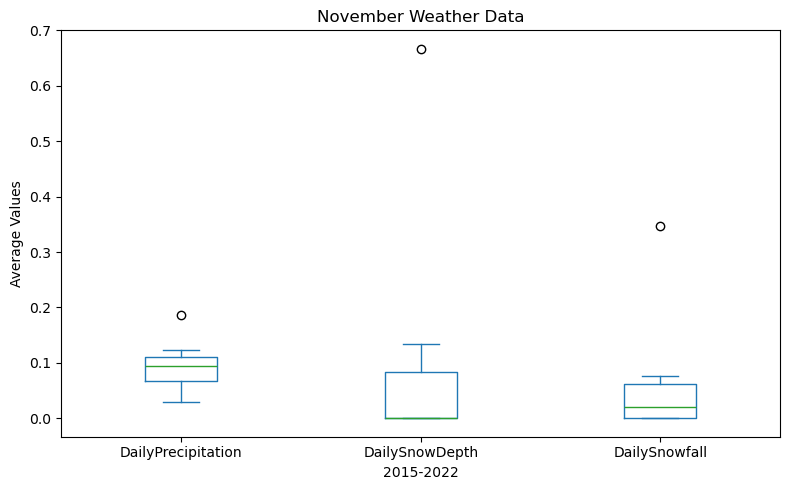

In [442]:
november_box_plot = nov_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
november_box_plot.set_title('November Weather Data')
november_box_plot.set_xlabel('2015-2022')
november_box_plot.set_ylabel('Average Values')

plt.tight_layout()

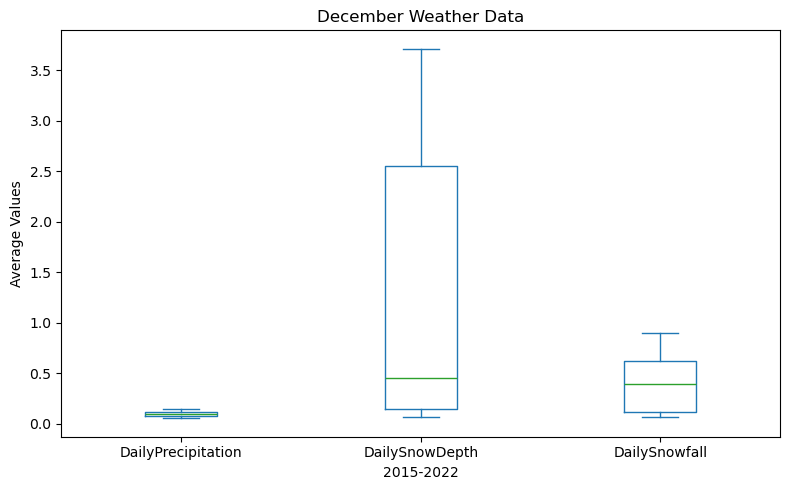

In [443]:
december_box_plot = dec_avg.plot(kind='box', figsize=(8, 5))

# Set title and labels without the need for tick labels manipulation
december_box_plot.set_title('December Weather Data')
december_box_plot.set_xlabel('2015-2022')
december_box_plot.set_ylabel('Average Values')

plt.tight_layout()

In [444]:
# Emily starts below here

In [445]:
ny_weather_clean_sorted_df

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0     2015-01-01 23:59:00                   190.0                26.0   
1     2015-01-02 23:59:00                   250.0                30.0   
2     2015-01-03 23:59:00                   170.0                21.0   
3     2015-01-04 23:59:00                   290.0                33.0   
4     2015-01-05 23:59:00                   280.0                42.0   
...                   ...                     ...                 ...   
2663  2022-05-27 23:59:00                   160.0                28.0   
2664  2022-05-28 23:59:00                   310.0                26.0   
2665  2022-05-29 23:59:00                    90.0                13.0   
2666  2022-05-30 23:59:00                   200.0                15.0   
2667  2022-05-31 23:59:00                   250.0                29.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
0                   0.00             0.0            0.0   
1                   0.00             0.0            0.0   
2                   0.57             0.0            1.6   
3                   0.22             1.0            0.0   
4                   0.00             0.0            0.0   
...                  ...             ...            ...   
2663                0.00             0.0            0.0   
2664                0.04             0.0            0.0   
2665                0.00             0.0            0.0   
2666                0.00             0.0            0.0   
2667                0.00             0.0            0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
0                           190.0                     20.0   
1                           310.0                     23.0   
2                           160.0                     15.0   
3                           290.0                     24.0   
4                           290.0                     32.0   
...                           ...                      ...   
2663                        160.0                     21.0   
2664                        310.0                     22.0   
2665                        180.0                      9.0   
2666                        190.0                     12.0   
2667                        250.0                     21.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                               25.0                            32.0   
1                               32.0                            37.0   
2                               27.0                            33.0   
3                               39.0                            45.0   
4                               27.0                            41.0   
...                              ...                             ...   
2663                            70.0                            77.0   
2664                            68.0                            80.0   
2665                            66.0                            80.0   
2666                            72.0                            88.0   
2667                            79.0                            92.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
0                               18.0  2015      1    1  
1                               26.0  2015      1    2  
2                               20.0  2015      1    3  
3                               33.0  2015      1    4  
4                               13.0  2015      1    5  
...                              ...   ...    ...  ...  
2663                            63.0  2022      5   27  
2664                            56.0  2022      5   28  
2665                            51.0  2022      5   29  
2666                            55.0  2022      5   30  
2667                            65.0  2022      5   31  

[2668 rows x 14 columns]

In [446]:
df_2015 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2015]
df_2015

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0    2015-01-01 23:59:00                   190.0                26.0   
1    2015-01-02 23:59:00                   250.0                30.0   
2    2015-01-03 23:59:00                   170.0                21.0   
3    2015-01-04 23:59:00                   290.0                33.0   
4    2015-01-05 23:59:00                   280.0                42.0   
..                   ...                     ...                 ...   
331  2015-12-27 23:59:00                   280.0                33.0   
332  2015-12-28 23:59:00                    40.0                27.0   
333  2015-12-29 23:59:00                   170.0                23.0   
334  2015-12-30 23:59:00                   190.0                22.0   
335  2015-12-31 23:59:00                   280.0                27.0   

     DailyPrecipitation  DailySnowDepth  DailySnowfall  \
0                  0.00             0.0            0.0   
1                  0.00             0.0            0.0   
2                  0.57             0.0            1.6   
3                  0.22             1.0            0.0   
4                  0.00             0.0            0.0   
..                  ...             ...            ...   
331                0.40             0.0            0.0   
332                0.12             0.0            0.9   
333                0.90             2.0            1.3   
334                0.03             2.0            0.0   
335                0.00             1.0            0.0   

     DailySustainedWindDirection  DailySustainedWindSpeed  \
0                          190.0                     20.0   
1                          310.0                     23.0   
2                          160.0                     15.0   
3                          290.0                     24.0   
4                          290.0                     32.0   
..                           ...                      ...   
331                        290.0                     25.0   
332                         20.0                     22.0   
333                        160.0                     16.0   
334                        170.0                     16.0   
335                        280.0                     18.0   

     DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                              25.0                            32.0   
1                              32.0                            37.0   
2                              27.0                            33.0   
3                              39.0                            45.0   
4                              27.0                            41.0   
..                              ...                             ...   
331                            43.0                            51.0   
332                            29.0                            36.0   
333                            30.0                            35.0   
334                            38.0                            40.0   
335                            40.0                            43.0   

     DailyMinimumDryBulbTemperature  Year  Month  Day  
0                              18.0  2015      1    1  
1                              26.0  2015      1    2  
2                              20.0  2015      1    3  
3                              33.0  2015      1    4  
4                              13.0  2015      1    5  
..                              ...   ...    ...  ...  
331                            35.0  2015     12   27  
332                            22.0  2015     12   28  
333                            24.0  2015     12   29  
334                            35.0  2015     12   30  
335                            37.0  2015     12   31  

[336 rows x 14 columns]

In [447]:
df_jan2015 = df_2015.loc[df_2015["Month"] ==1]
jan_2015 = df_jan2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [448]:
df_2016 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2016]
df_2016

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
336  2016-01-01 23:59:00                   290.0                23.0   
337  2016-01-02 23:59:00                   280.0                21.0   
338  2016-01-03 23:59:00                   290.0                35.0   
339  2016-01-04 23:59:00                   290.0                33.0   
340  2016-01-05 23:59:00                   320.0                16.0   
..                   ...                     ...                 ...   
694  2016-12-27 23:59:00                   300.0                34.0   
695  2016-12-28 23:59:00                   280.0                28.0   
696  2016-12-29 23:59:00                   160.0                25.0   
697  2016-12-30 23:59:00                   290.0                43.0   
698  2016-12-31 23:59:00                   160.0                36.0   

     DailyPrecipitation  DailySnowDepth  DailySnowfall  \
336                0.01             0.0            0.3   
337                0.00             0.0            0.0   
338                0.00             0.0            0.0   
339                0.03             0.0            0.8   
340                0.00             0.0            0.0   
..                  ...             ...            ...   
694                0.01             0.0            0.0   
695                0.00             0.0            0.1   
696                0.17             0.0            2.1   
697                0.00             2.0            0.1   
698                0.00             1.0            0.1   

     DailySustainedWindDirection  DailySustainedWindSpeed  \
336                        300.0                     18.0   
337                        240.0                     16.0   
338                        300.0                     26.0   
339                        290.0                     26.0   
340                        330.0                     12.0   
..                           ...                      ...   
694                        310.0                     26.0   
695                        300.0                     21.0   
696                        270.0                     17.0   
697                        290.0                     32.0   
698                        180.0                     26.0   

     DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
336                            34.0                            38.0   
337                            32.0                            35.0   
338                            34.0                            41.0   
339                            19.0                            32.0   
340                            11.0                            19.0   
..                              ...                             ...   
694                            42.0                            48.0   
695                            34.0                            38.0   
696                            29.0                            34.0   
697                            30.0                            35.0   
698                            28.0                            37.0   

     DailyMinimumDryBulbTemperature  Year  Month  Day  
336                            30.0  2016      1    1  
337                            29.0  2016      1    2  
338                            27.0  2016      1    3  
339                             6.0  2016      1    4  
340                             2.0  2016      1    5  
..                              ...   ...    ...  ...  
694                            35.0  2016     12   27  
695                            29.0  2016     12   28  
696                            24.0  2016     12   29  
697                            24.0  2016     12   30  
698                            19.0  2016     12   31  

[363 rows x 14 columns]

In [449]:
df_jan2016 = df_2016.loc[df_2016["Month"] ==1]
jan_2016 = df_jan2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [450]:
df_2017 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2017]
df_2017

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
699   2017-01-01 23:59:00                   320.0                27.0   
700   2017-01-02 23:59:00                   350.0                 8.0   
701   2017-01-03 23:59:00                   340.0                11.0   
702   2017-01-04 23:59:00                   260.0                38.0   
703   2017-01-05 23:59:00                   290.0                42.0   
...                   ...                     ...                 ...   
1057  2017-12-27 23:59:00                   290.0                25.0   
1058  2017-12-28 23:59:00                   280.0                30.0   
1059  2017-12-29 23:59:00                   300.0                29.0   
1060  2017-12-30 23:59:00                   180.0                11.0   
1061  2017-12-31 23:59:00                   300.0                29.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
699                 0.04             1.0            0.1   
700                 0.00             1.0            0.0   
701                 0.48             1.0            0.0   
702                 0.10             0.0            0.2   
703                 0.00             0.0            0.0   
...                  ...             ...            ...   
1057                0.00             4.0            0.0   
1058                0.00             3.0            0.0   
1059                0.00             3.0            0.0   
1060                0.03             3.0            0.5   
1061                0.00             4.0            0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
699                         300.0                     21.0   
700                         170.0                      6.0   
701                         350.0                      8.0   
702                         280.0                     29.0   
703                         290.0                     29.0   
...                           ...                      ...   
1057                        310.0                     18.0   
1058                        280.0                     24.0   
1059                        290.0                     24.0   
1060                        190.0                      8.0   
1061                        300.0                     22.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
699                             29.0                            38.0   
700                             27.0                            36.0   
701                             34.0                            37.0   
702                             33.0                            44.0   
703                             24.0                            29.0   
...                              ...                             ...   
1057                             7.0                            17.0   
1058                             2.0                             8.0   
1059                             6.0                            14.0   
1060                             7.0                            16.0   
1061                             3.0                             8.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
699                             20.0  2017      1    1  
700                             17.0  2017      1    2  
701                             31.0  2017      1    3  
702                             22.0  2017      1    4  
703                             19.0  2017      1    5  
...                              ...   ...    ...  ...  
1057                            -4.0  2017     12   27  
1058                            -5.0  2017     12   28  
1059                            -3.0  2017     12   29  
1060                            -3.0  2017     12   30  
1061                            -2.0  2017     12   31  

[363 rows x 14 columns]

In [451]:
df_jan2017 = df_2017.loc[df_2017["Month"] ==1]
jan_2017 = df_jan2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [452]:
df_2018 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2018]
df_2018

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
1062  2018-01-01 23:59:00                   310.0                22.0   
1063  2018-01-02 23:59:00                   310.0                22.0   
1064  2018-01-03 23:59:00                   190.0                16.0   
1065  2018-01-04 23:59:00                   280.0                43.0   
1066  2018-01-05 23:59:00                   280.0                52.0   
...                   ...                     ...                 ...   
1420  2018-12-27 23:59:00                   300.0                25.0   
1421  2018-12-28 23:59:00                   160.0                36.0   
1422  2018-12-29 23:59:00                   320.0                34.0   
1423  2018-12-30 23:59:00                   170.0                15.0   
1424  2018-12-31 23:59:00                   170.0                29.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
1062                0.00             3.0            0.0   
1063                0.00             3.0            0.0   
1064                0.00             3.0            0.0   
1065                0.27             3.0            4.9   
1066                0.00             5.0            0.0   
...                  ...             ...            ...   
1420                0.00             0.0            0.0   
1421                0.09             0.0            0.0   
1422                0.00             0.0            0.0   
1423                0.01             0.0            0.1   
1424                0.50             0.0            0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
1062                        280.0                     17.0   
1063                        310.0                     17.0   
1064                        190.0                     13.0   
1065                        290.0                     35.0   
1066                        300.0                     37.0   
...                           ...                      ...   
1420                        300.0                     18.0   
1421                        170.0                     24.0   
1422                        290.0                     25.0   
1423                        320.0                     12.0   
1424                        170.0                     21.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
1062                             1.0                            11.0   
1063                             8.0                            20.0   
1064                            15.0                            22.0   
1065                            18.0                            22.0   
1066                             9.0                            14.0   
...                              ...                             ...   
1420                            30.0                            35.0   
1421                            43.0                            50.0   
1422                            38.0                            50.0   
1423                            28.0                            33.0   
1424                            35.0                            41.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
1062                           -10.0  2018      1    1  
1063                            -4.0  2018      1    2  
1064                             7.0  2018      1    3  
1065                            14.0  2018      1    4  
1066                             3.0  2018      1    5  
...                              ...   ...    ...  ...  
1420                            24.0  2018     12   27  
1421                            35.0  2018     12   28  
1422                            26.0  2018     12   29  
1423                            23.0  2018     12   30  
1424                            29.0  2018     12   31  

[363 rows x 14 columns]

In [453]:
df_jan2018 = df_2018.loc[df_2018["Month"] ==1]
jan_2018 = df_jan2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [454]:
df_2019 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2019]
df_2019

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
1425  2019-01-01 23:59:00                   280.0                55.0   
1426  2019-01-02 23:59:00                   160.0                24.0   
1427  2019-01-03 23:59:00                   280.0                34.0   
1428  2019-01-04 23:59:00                   190.0                19.0   
1429  2019-01-05 23:59:00                   280.0                23.0   
...                   ...                     ...                 ...   
1781  2019-12-27 23:59:00                   170.0                25.0   
1782  2019-12-28 23:59:00                   300.0                28.0   
1783  2019-12-29 23:59:00                   280.0                23.0   
1784  2019-12-30 23:59:00                   110.0                13.0   
1785  2019-12-31 23:59:00                   260.0                24.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
1425                0.10             0.0            0.0   
1426                0.00             0.0            0.0   
1427                0.00             0.0            0.1   
1428                0.00             0.0            0.0   
1429                0.42             0.0            0.0   
...                  ...             ...            ...   
1781                0.01             0.0            0.0   
1782                0.00             0.0            0.0   
1783                0.62             0.0            0.0   
1784                0.77             0.0            0.3   
1785                0.02             0.0            0.1   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
1425                        280.0                     36.0   
1426                        170.0                     18.0   
1427                        290.0                     24.0   
1428                        180.0                     15.0   
1429                        300.0                     18.0   
...                           ...                      ...   
1781                        170.0                     20.0   
1782                        280.0                     21.0   
1783                        310.0                     17.0   
1784                        110.0                     10.0   
1785                        250.0                     17.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
1425                            40.0                            53.0   
1426                            27.0                            34.0   
1427                            38.0                            43.0   
1428                            37.0                            43.0   
1429                            35.0                            40.0   
...                              ...                             ...   
1781                            44.0                            48.0   
1782                            36.0                            44.0   
1783                            34.0                            41.0   
1784                            37.0                            39.0   
1785                            37.0                            39.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
1425                            27.0  2019      1    1  
1426                            20.0  2019      1    2  
1427                            32.0  2019      1    3  
1428                            30.0  2019      1    4  
1429                            29.0  2019      1    5  
...                              ...   ...    ...  ...  
1781                            40.0  2019     12   27  
1782                            27.0  2019     12   28  
1783                            26.0  2019     12   29  
1784                            34.0  2019     12   30  
1785                            34.0  2019     12   31  

[361 rows x 14 columns]

In [455]:
df_jan2019 = df_2019.loc[df_2019["Month"] ==1]
jan_2019 = df_jan2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [456]:
df_2020 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2020]
df_2020

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
1786  2020-01-01 23:59:00                   280.0                30.0   
1787  2020-01-02 23:59:00                   180.0                21.0   
1788  2020-01-03 23:59:00                   170.0                14.0   
1789  2020-01-04 23:59:00                   340.0                16.0   
1790  2020-01-05 23:59:00                   290.0                40.0   
...                   ...                     ...                 ...   
2147  2020-12-27 23:59:00                   150.0                27.0   
2148  2020-12-28 23:59:00                   180.0                33.0   
2149  2020-12-29 23:59:00                   270.0                36.0   
2150  2020-12-30 23:59:00                   160.0                35.0   
2151  2020-12-31 23:59:00                   280.0                33.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
1786                0.00             0.0            0.0   
1787                0.00             0.0            0.0   
1788                0.00             0.0            0.0   
1789                0.32             0.0            0.0   
1790                0.00             0.0            0.0   
...                  ...             ...            ...   
2147                0.00             1.0            0.0   
2148                0.00             0.0            0.0   
2149                0.00             0.0            0.0   
2150                0.02             0.0            0.0   
2151                0.03             0.0            0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
1786                        280.0                     23.0   
1787                        170.0                     16.0   
1788                        170.0                     10.0   
1789                        330.0                     13.0   
1790                        280.0                     30.0   
...                           ...                      ...   
2147                        150.0                     20.0   
2148                        150.0                     24.0   
2149                        270.0                     29.0   
2150                        150.0                     26.0   
2151                        280.0                     23.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
1786                            37.0                            40.0   
1787                            36.0                            45.0   
1788                            43.0                            47.0   
1789                            39.0                            43.0   
1790                            31.0                            37.0   
...                              ...                             ...   
2147                            29.0                            36.0   
2148                            36.0                            41.0   
2149                            26.0                            35.0   
2150                            25.0                            35.0   
2151                            32.0                            39.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
1786                            34.0  2020      1    1  
1787                            26.0  2020      1    2  
1788                            39.0  2020      1    3  
1789                            35.0  2020      1    4  
1790                            24.0  2020      1    5  
...                              ...   ...    ...  ...  
2147                            22.0  2020     12   27  
2148                            31.0  2020     12   28  
2149                            16.0  2020     12   29  
2150                            15.0  2020     12   30  
2151                            24.0  2020     12   31  

[366 rows x 14 columns]

In [457]:
df_jan2020 = df_2020.loc[df_2020["Month"] ==1]
jan_2020 = df_jan2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [458]:
df_2021 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2021]
df_2021

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
2152  2021-01-01 23:59:00                   280.0                12.0   
2153  2021-01-02 23:59:00                   290.0                36.0   
2154  2021-01-03 23:59:00                   130.0                14.0   
2155  2021-01-04 23:59:00                   330.0                10.0   
2156  2021-01-05 23:59:00                   360.0                18.0   
...                   ...                     ...                 ...   
2512  2021-12-27 23:59:00                   290.0                23.0   
2513  2021-12-28 23:59:00                   290.0                34.0   
2514  2021-12-29 23:59:00                   350.0                 6.0   
2515  2021-12-30 23:59:00                   140.0                 9.0   
2516  2021-12-31 23:59:00                   170.0                14.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
2152                0.26             0.0            1.5   
2153                0.45             1.0            0.0   
2154                0.19             0.0            2.7   
2155                0.04             3.0            0.4   
2156                0.00             1.0            0.0   
...                  ...             ...            ...   
2512                0.00             0.0            0.0   
2513                0.05             0.0            0.3   
2514                0.01             0.0            0.1   
2515                0.01             0.0            0.0   
2516                0.08             0.0            0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
2152                        280.0                      9.0   
2153                        270.0                     26.0   
2154                        130.0                     10.0   
2155                        330.0                      8.0   
2156                        360.0                     13.0   
...                           ...                      ...   
2512                        280.0                     18.0   
2513                        270.0                     23.0   
2514                        340.0                      5.0   
2515                        320.0                      7.0   
2516                        160.0                     12.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
2152                            24.0                            32.0   
2153                            35.0                            40.0   
2154                            31.0                            33.0   
2155                            31.0                            34.0   
2156                            31.0                            33.0   
...                              ...                             ...   
2512                            30.0                            34.0   
2513                            39.0                            46.0   
2514                            36.0                            38.0   
2515                            40.0                            44.0   
2516                            43.0                            47.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
2152                            16.0  2021      1    1  
2153                            29.0  2021      1    2  
2154                            28.0  2021      1    3  
2155                            28.0  2021      1    4  
2156                            28.0  2021      1    5  
...                              ...   ...    ...  ...  
2512                            26.0  2021     12   27  
2513                            31.0  2021     12   28  
2514                            33.0  2021     12   29  
2515                            35.0  2021     12   30  
2516                            38.0  2021     12   31  

[365 rows x 14 columns]

In [459]:
df_jan2021 = df_2021.loc[df_2021["Month"] ==1]
jan_2021 = df_jan2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [460]:
df_2022 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2022]
df_2022

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
2517  2022-01-01 23:59:00                   170.0                20.0   
2518  2022-01-02 23:59:00                   280.0                30.0   
2519  2022-01-03 23:59:00                   280.0                30.0   
2520  2022-01-04 23:59:00                   160.0                19.0   
2521  2022-01-05 23:59:00                   160.0                33.0   
...                   ...                     ...                 ...   
2663  2022-05-27 23:59:00                   160.0                28.0   
2664  2022-05-28 23:59:00                   310.0                26.0   
2665  2022-05-29 23:59:00                    90.0                13.0   
2666  2022-05-30 23:59:00                   200.0                15.0   
2667  2022-05-31 23:59:00                   250.0                29.0   

      DailyPrecipitation  DailySnowDepth  DailySnowfall  \
2517                0.12             0.0            0.0   
2518                0.07             0.0            0.2   
2519                0.00             0.0            0.0   
2520                0.00             0.0            0.1   
2521                0.00             0.0            0.0   
...                  ...             ...            ...   
2663                0.00             0.0            0.0   
2664                0.04             0.0            0.0   
2665                0.00             0.0            0.0   
2666                0.00             0.0            0.0   
2667                0.00             0.0            0.0   

      DailySustainedWindDirection  DailySustainedWindSpeed  \
2517                        170.0                     15.0   
2518                        280.0                     24.0   
2519                        270.0                     21.0   
2520                        150.0                     14.0   
2521                        160.0                     24.0   
...                           ...                      ...   
2663                        160.0                     21.0   
2664                        310.0                     22.0   
2665                        180.0                      9.0   
2666                        190.0                     12.0   
2667                        250.0                     21.0   

      DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
2517                            46.0                            51.0   
2518                            36.0                            49.0   
2519                            18.0                            23.0   
2520                            20.0                            29.0   
2521                            33.0                            38.0   
...                              ...                             ...   
2663                            70.0                            77.0   
2664                            68.0                            80.0   
2665                            66.0                            80.0   
2666                            72.0                            88.0   
2667                            79.0                            92.0   

      DailyMinimumDryBulbTemperature  Year  Month  Day  
2517                            41.0  2022      1    1  
2518                            23.0  2022      1    2  
2519                            13.0  2022      1    3  
2520                            10.0  2022      1    4  
2521                            28.0  2022      1    5  
...                              ...   ...    ...  ...  
2663                            63.0  2022      5   27  
2664                            56.0  2022      5   28  
2665                            51.0  2022      5   29  
2666                            55.0  2022      5   30  
2667                            65.0  2022      5   31  

[151 rows x 14 columns]

In [461]:
df_jan2022 = df_2022.loc[df_2022["Month"] ==1]
jan_2022 = df_jan2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

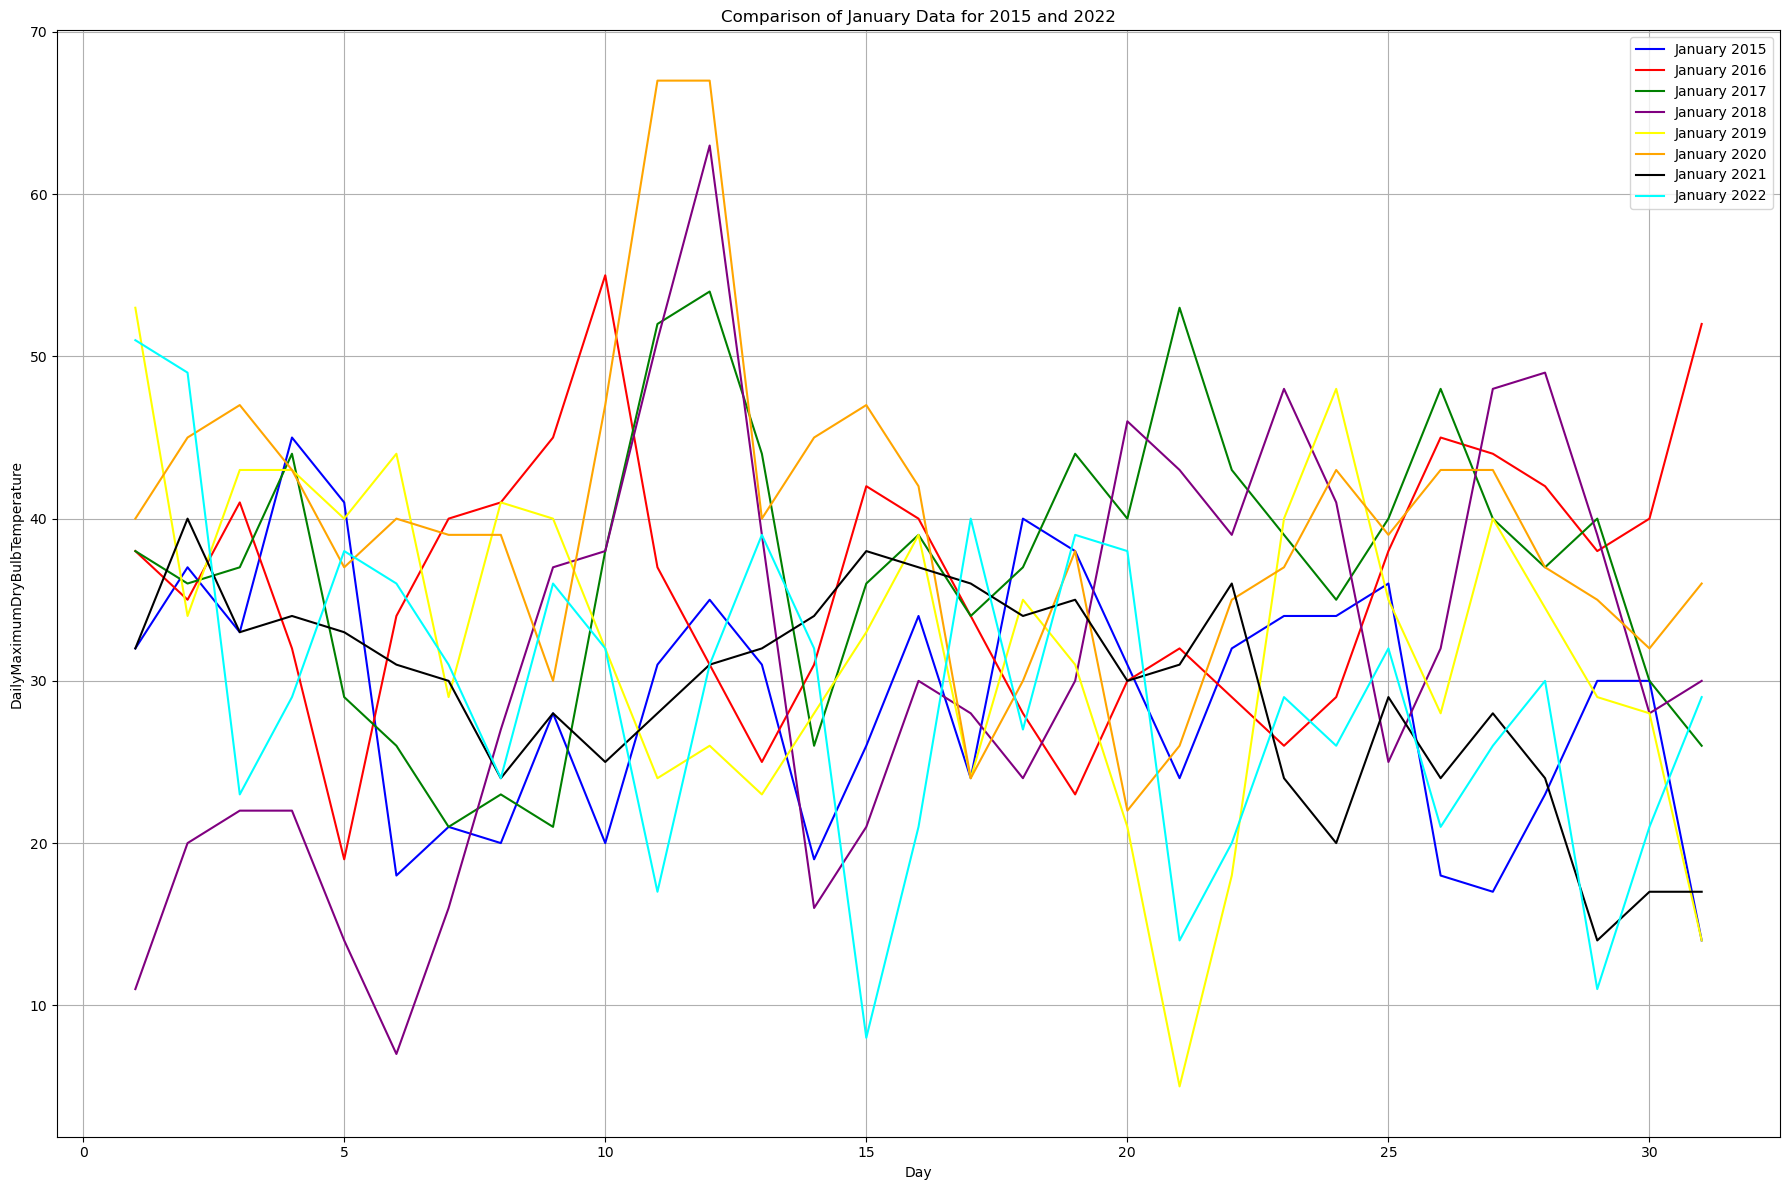

In [462]:
# Create the plot
plt.figure(figsize=(18, 12))

# Plot the data for January 2015
plt.plot(jan_2015['Day'], jan_2015['DailyMaximumDryBulbTemperature'], label='January 2015', color='blue')

# Plot the data for January 2016
plt.plot(jan_2016['Day'], jan_2016['DailyMaximumDryBulbTemperature'], label='January 2016', color='red')

# Plot the data for January 2017
plt.plot(jan_2017['Day'], jan_2017['DailyMaximumDryBulbTemperature'], label='January 2017', color='green')

#Plot the data for January 2018
plt.plot(jan_2018['Day'], jan_2018['DailyMaximumDryBulbTemperature'], label='January 2018', color='purple')

#Plot the data for January 2019
plt.plot(jan_2019['Day'], jan_2019['DailyMaximumDryBulbTemperature'], label='January 2019', color='yellow')

#Plot the data for January 2020
plt.plot(jan_2020['Day'], jan_2020['DailyMaximumDryBulbTemperature'], label='January 2020', color='orange')

#Plot the data for January 2021
plt.plot(jan_2021['Day'], jan_2021['DailyMaximumDryBulbTemperature'], label='January 2021', color='black')

#Plot the data for January 2022
plt.plot(jan_2022['Day'], jan_2022['DailyMaximumDryBulbTemperature'], label='January 2022', color='cyan')

# Add title and axis labels
plt.title('Comparison of January Data for 2015 and 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [463]:
#Febuary
df_2015 = ny_weather_clean_sorted_df.loc[ny_weather_clean_sorted_df["Year"] ==2015]
df_2015

DATE  DailyPeakWindDirection  DailyPeakWindSpeed  \
0    2015-01-01 23:59:00                   190.0                26.0   
1    2015-01-02 23:59:00                   250.0                30.0   
2    2015-01-03 23:59:00                   170.0                21.0   
3    2015-01-04 23:59:00                   290.0                33.0   
4    2015-01-05 23:59:00                   280.0                42.0   
..                   ...                     ...                 ...   
331  2015-12-27 23:59:00                   280.0                33.0   
332  2015-12-28 23:59:00                    40.0                27.0   
333  2015-12-29 23:59:00                   170.0                23.0   
334  2015-12-30 23:59:00                   190.0                22.0   
335  2015-12-31 23:59:00                   280.0                27.0   

     DailyPrecipitation  DailySnowDepth  DailySnowfall  \
0                  0.00             0.0            0.0   
1                  0.00             0.0            0.0   
2                  0.57             0.0            1.6   
3                  0.22             1.0            0.0   
4                  0.00             0.0            0.0   
..                  ...             ...            ...   
331                0.40             0.0            0.0   
332                0.12             0.0            0.9   
333                0.90             2.0            1.3   
334                0.03             2.0            0.0   
335                0.00             1.0            0.0   

     DailySustainedWindDirection  DailySustainedWindSpeed  \
0                          190.0                     20.0   
1                          310.0                     23.0   
2                          160.0                     15.0   
3                          290.0                     24.0   
4                          290.0                     32.0   
..                           ...                      ...   
331                        290.0                     25.0   
332                         20.0                     22.0   
333                        160.0                     16.0   
334                        170.0                     16.0   
335                        280.0                     18.0   

     DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
0                              25.0                            32.0   
1                              32.0                            37.0   
2                              27.0                            33.0   
3                              39.0                            45.0   
4                              27.0                            41.0   
..                              ...                             ...   
331                            43.0                            51.0   
332                            29.0                            36.0   
333                            30.0                            35.0   
334                            38.0                            40.0   
335                            40.0                            43.0   

     DailyMinimumDryBulbTemperature  Year  Month  Day  
0                              18.0  2015      1    1  
1                              26.0  2015      1    2  
2                              20.0  2015      1    3  
3                              33.0  2015      1    4  
4                              13.0  2015      1    5  
..                              ...   ...    ...  ...  
331                            35.0  2015     12   27  
332                            22.0  2015     12   28  
333                            24.0  2015     12   29  
334                            35.0  2015     12   30  
335                            37.0  2015     12   31  

[336 rows x 14 columns]

In [464]:
df_feb2015 = df_2015.loc[df_2015["Month"] ==2]
feb_2015 = df_feb2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [465]:

df_feb2016 = df_2016.loc[df_2016["Month"] ==2]
feb_2016 = df_feb2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [466]:

df_feb2017 = df_2017.loc[df_2017["Month"] ==2]
feb_2017 = df_feb2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [467]:

df_feb2018 = df_2018.loc[df_2018["Month"] ==2]
feb_2018 = df_feb2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [468]:
df_feb2019 = df_2019.loc[df_2019["Month"] ==2]
feb_2019 = df_feb2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [469]:
df_feb2020 = df_2020.loc[df_2020["Month"] ==2]
feb_2020 = df_feb2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [470]:
df_feb2021 = df_2021.loc[df_2021["Month"] ==2]
feb_2021 = df_feb2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [471]:
df_feb2022 = df_2022.loc[df_2022["Month"] ==2]
feb_2022 = df_feb2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

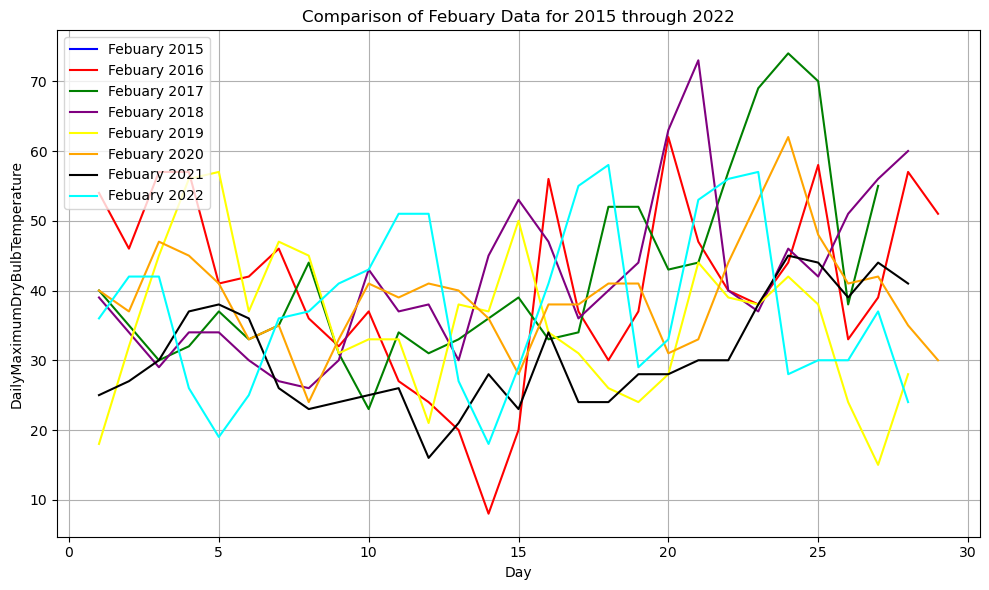

In [472]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(feb_2015['Day'], feb_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(feb_2016['Day'], feb_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(feb_2017['Day'], feb_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(feb_2018['Day'], feb_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(feb_2019['Day'], feb_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(feb_2020['Day'], feb_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(feb_2021['Day'], feb_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(feb_2022['Day'], feb_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [473]:
df_mar2015 = df_2015.loc[df_2015["Month"] ==3]
mar_2015 = df_mar2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [474]:
df_mar2016 = df_2016.loc[df_2016["Month"] ==3]
mar_2016 = df_mar2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [475]:
df_mar2017 = df_2017.loc[df_2017["Month"] ==3]
mar_2017 = df_mar2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [476]:
df_mar2018 = df_2018.loc[df_2018["Month"] ==3]
mar_2018 = df_mar2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [477]:
df_mar2019 = df_2019.loc[df_2019["Month"] ==3]
mar_2019 = df_mar2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [478]:
df_mar2020 = df_2020.loc[df_2020["Month"] ==3]
mar_2020 = df_mar2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [479]:
df_mar2021 = df_2021.loc[df_2021["Month"] ==3]
mar_2021 = df_mar2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [480]:
df_mar2022 = df_2022.loc[df_2022["Month"] ==3]
mar_2022 = df_mar2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

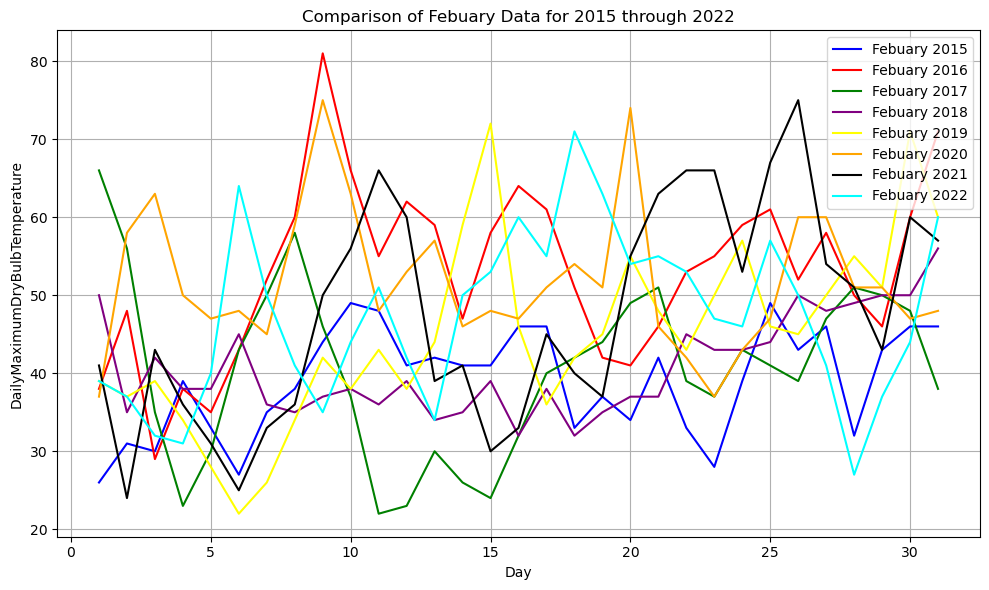

In [481]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(mar_2015['Day'], mar_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(mar_2016['Day'], mar_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(mar_2017['Day'], mar_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(mar_2018['Day'], mar_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(mar_2019['Day'], mar_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(mar_2020['Day'], mar_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(mar_2021['Day'], mar_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(mar_2022['Day'], mar_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [482]:
# April
df_apr2015 = df_2015.loc[df_2015["Month"] ==4]
apr_2015 = df_apr2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [483]:
df_apr2016 = df_2016.loc[df_2016["Month"] ==4]
apr_2016 = df_apr2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [484]:
df_apr2017 = df_2017.loc[df_2017["Month"] ==4]
apr_2017 = df_apr2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [485]:
df_apr2018 = df_2018.loc[df_2018["Month"] ==4]
apr_2018 = df_apr2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [486]:
df_apr2019 = df_2019.loc[df_2019["Month"] ==4]
apr_2019 = df_apr2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [487]:
df_apr2020 = df_2020.loc[df_2020["Month"] ==4]
apr_2020 = df_apr2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [488]:
df_apr2021 = df_2021.loc[df_2021["Month"] ==4]
apr_2021 = df_apr2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [489]:
df_apr2022 = df_2022.loc[df_2022["Month"] ==4]
apr_2022 = df_apr2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

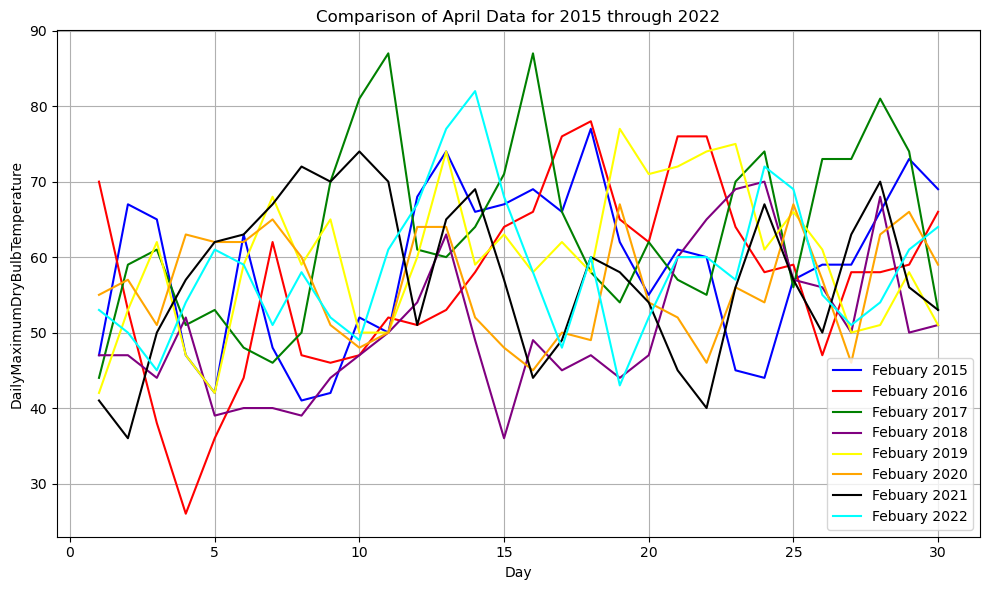

In [490]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(apr_2015['Day'], apr_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(apr_2016['Day'], apr_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(apr_2017['Day'], apr_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(apr_2018['Day'], apr_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(apr_2019['Day'], apr_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(apr_2020['Day'], apr_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(apr_2021['Day'], apr_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(apr_2022['Day'], apr_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of April Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [491]:
# May
df_may2015 = df_2015.loc[df_2015["Month"] ==5]
may_2015 = df_may2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [492]:
df_may2016 = df_2016.loc[df_2016["Month"] ==5]
may_2016 = df_may2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [493]:
df_may2017 = df_2017.loc[df_2017["Month"] ==5]
may_2017 = df_may2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [494]:
df_may2018 = df_2018.loc[df_2018["Month"] ==5]
may_2018 = df_may2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [495]:
df_may2019 = df_2019.loc[df_2019["Month"] ==5]
may_2019 = df_may2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [496]:
df_may2020 = df_2020.loc[df_2020["Month"] ==5]
may_2020 = df_may2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [497]:
df_may2021 = df_2021.loc[df_2021["Month"] ==5]
may_2021 = df_may2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [498]:
df_may2022 = df_2022.loc[df_2022["Month"] ==5]
may_2022 = df_may2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

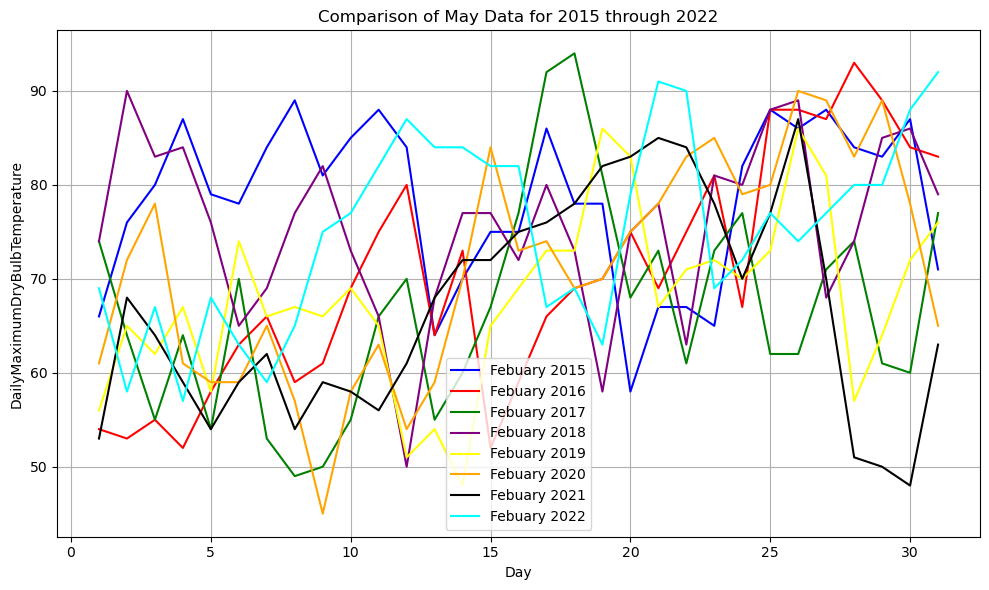

In [499]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(may_2015['Day'], may_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(may_2016['Day'], may_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(may_2017['Day'], may_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(may_2018['Day'], may_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(may_2019['Day'], may_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(may_2020['Day'], may_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(may_2021['Day'], may_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(may_2022['Day'], may_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of May Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [500]:
#June
df_june2015 = df_2015.loc[df_2015["Month"] ==6]
june_2015 = df_june2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [501]:
df_june2016 = df_2016.loc[df_2016["Month"] ==6]
june_2016 = df_june2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [502]:
df_june2017 = df_2017.loc[df_2017["Month"] ==6]
june_2017 = df_june2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [503]:
df_june2018 = df_2018.loc[df_2018["Month"] ==6]
june_2018 = df_june2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [504]:
df_june2019 = df_2019.loc[df_2019["Month"] ==6]
june_2019 = df_june2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [505]:
df_june2020 = df_2020.loc[df_2020["Month"] ==6]
june_2020 = df_june2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [506]:
df_june2021 = df_2021.loc[df_2021["Month"] ==6]
june_2021 = df_june2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [507]:
df_june2022 = df_2022.loc[df_2022["Month"] ==6]
june_2022 = df_june2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

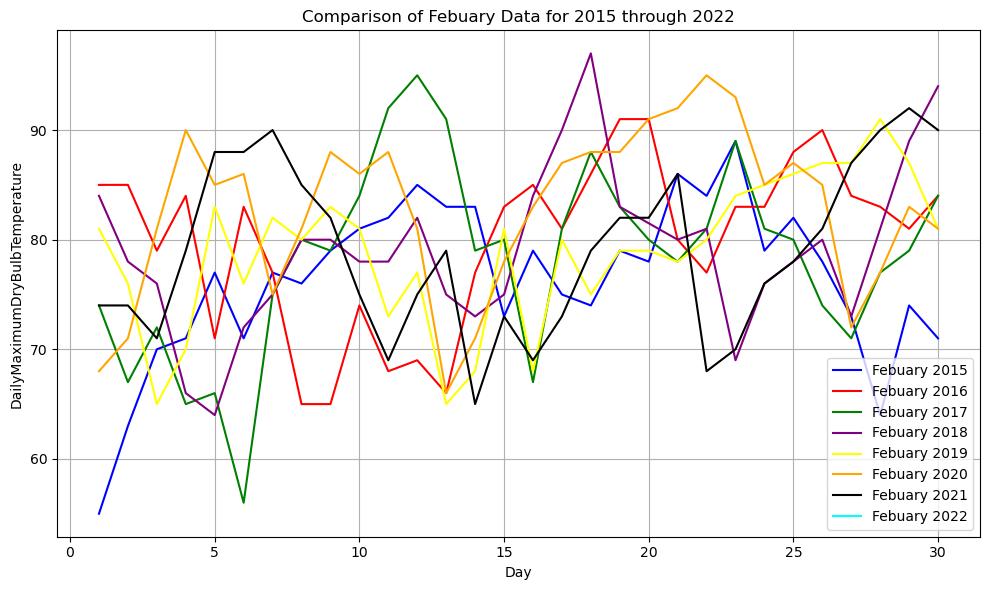

In [508]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(june_2015['Day'], june_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(june_2016['Day'], june_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(june_2017['Day'], june_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(june_2018['Day'], june_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(june_2019['Day'], june_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(june_2020['Day'], june_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(june_2021['Day'], june_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(june_2022['Day'], june_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [509]:
# July 
df_july2015 = df_2015.loc[df_2015["Month"] == 7]
july_2015 = df_july2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [510]:
df_july2016 = df_2016.loc[df_2016["Month"] == 7]
july_2016 = df_july2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [511]:
df_july2017 = df_2017.loc[df_2017["Month"] == 7]
july_2017 = df_july2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [512]:
df_july2018 = df_2018.loc[df_2018["Month"] == 7]
july_2018 = df_july2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [513]:
df_july2019 = df_2019.loc[df_2019["Month"] == 7]
july_2019 = df_july2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [514]:
df_july2020 = df_2020.loc[df_2020["Month"] == 7]
july_2020 = df_july2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [515]:
df_july2021 = df_2021.loc[df_2021["Month"] == 7]
july_2021 = df_july2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


In [516]:
df_july2022 = df_2022.loc[df_2022["Month"] == 7]
july_2022 = df_july2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]


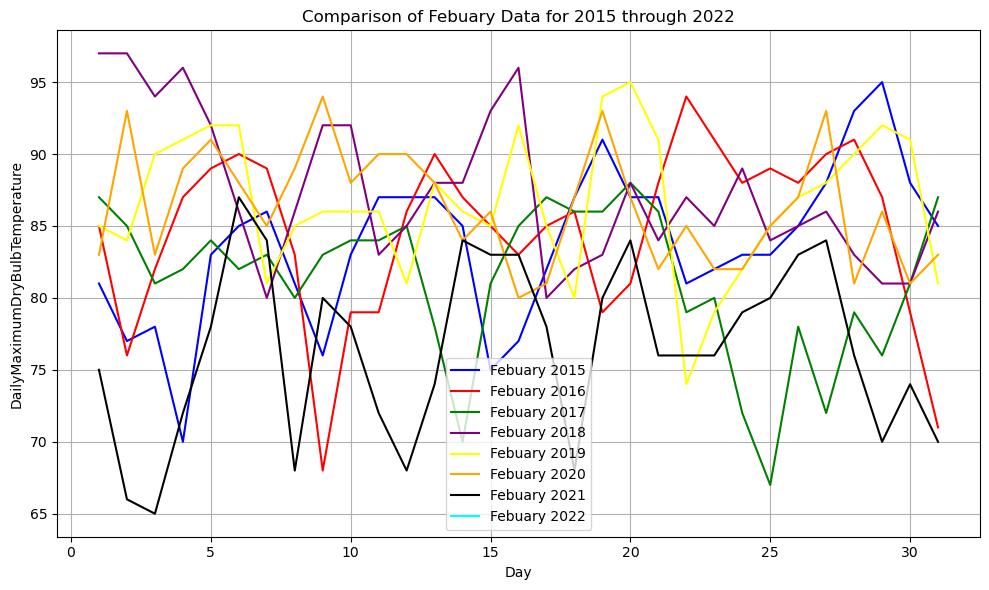

In [517]:

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(july_2015['Day'], july_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(july_2016['Day'], july_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(july_2017['Day'], july_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(july_2018['Day'], july_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(july_2019['Day'], july_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(july_2020['Day'], july_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(july_2021['Day'], july_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(july_2022['Day'], july_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [518]:
#August
df_aug2015 = df_2015.loc[df_2015["Month"] ==8]
aug_2015 = df_aug2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [519]:
df_aug2016 = df_2016.loc[df_2016["Month"] ==8]
aug_2016 = df_aug2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [520]:
df_aug2017 = df_2017.loc[df_2017["Month"] ==8]
aug_2017 = df_aug2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [521]:
df_aug2018 = df_2018.loc[df_2018["Month"] ==8]
aug_2018 = df_aug2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [522]:
df_aug2019 = df_2019.loc[df_2019["Month"] ==8]
aug_2019 = df_aug2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [523]:
df_aug2020 = df_2020.loc[df_2020["Month"] ==8]
aug_2020 = df_aug2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [524]:
df_aug2021 = df_2021.loc[df_2021["Month"] ==8]
aug_2021 = df_aug2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [525]:
df_aug2022 = df_2022.loc[df_2022["Month"] ==8]
aug_2022 = df_aug2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

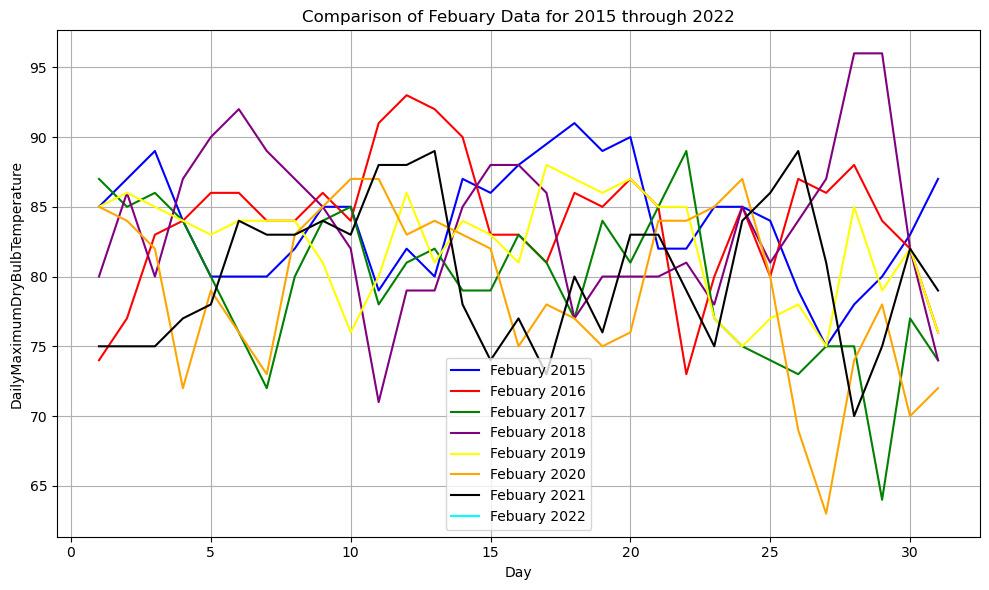

In [526]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(aug_2015['Day'], aug_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(aug_2016['Day'], aug_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(aug_2017['Day'], aug_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(aug_2018['Day'], aug_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(aug_2019['Day'], aug_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(aug_2020['Day'], aug_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(aug_2021['Day'], aug_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(aug_2022['Day'], aug_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [527]:
#september
df_sept2015 = df_2015.loc[df_2015["Month"] ==9]
sept_2015 = df_sept2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [528]:
df_sept2016 = df_2016.loc[df_2016["Month"] ==9]
sept_2016 = df_sept2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [529]:
df_sept2017 = df_2017.loc[df_2017["Month"] ==9]
sept_2017 = df_sept2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [530]:
df_sept2018 = df_2018.loc[df_2018["Month"] ==9]
sept_2018 = df_sept2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [531]:
df_sept2019 = df_2019.loc[df_2019["Month"] ==9]
sept_2019 = df_sept2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [532]:
df_sept2020 = df_2020.loc[df_2020["Month"] ==9]
sept_2020 = df_sept2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [533]:
df_sept2021 = df_2021.loc[df_2021["Month"] ==9]
sept_2021 = df_sept2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [534]:
df_sept2022 = df_2022.loc[df_2022["Month"] ==9]
sept_2022 = df_sept2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

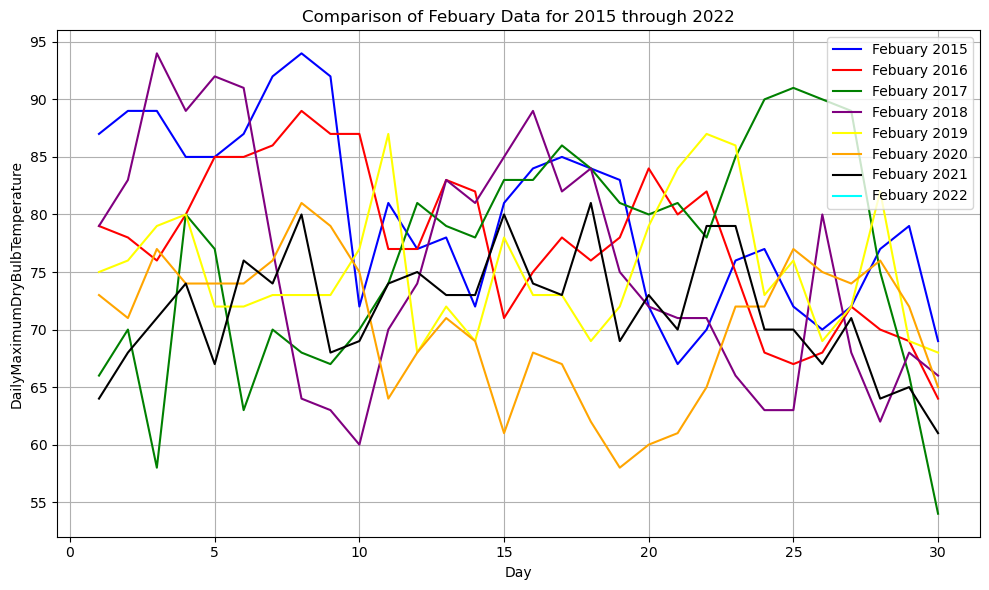

In [535]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(sept_2015['Day'], sept_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(sept_2016['Day'], sept_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(sept_2017['Day'], sept_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(sept_2018['Day'], sept_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(sept_2019['Day'], sept_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(sept_2020['Day'], sept_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(sept_2021['Day'], sept_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(sept_2022['Day'], sept_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [536]:
df_oct2015 = df_2015.loc[df_2015["Month"] ==10]
oct_2015 = df_oct2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [537]:
df_oct2016 = df_2016.loc[df_2016["Month"] ==10]
oct_2016 = df_oct2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [538]:
df_oct2017 = df_2017.loc[df_2017["Month"] ==10]
oct_2017 = df_oct2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [539]:
df_oct2018 = df_2018.loc[df_2018["Month"] ==10]
oct_2018 = df_oct2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [540]:
df_oct2019 = df_2019.loc[df_2019["Month"] ==10]
oct_2019 = df_oct2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [541]:
df_oct2020 = df_2020.loc[df_2020["Month"] ==10]
oct_2020 = df_oct2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [542]:
df_oct2021 = df_2021.loc[df_2021["Month"] ==10]
oct_2021 = df_oct2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [543]:
df_oct2022 = df_2022.loc[df_2022["Month"] ==10]
oct_2022 = df_oct2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

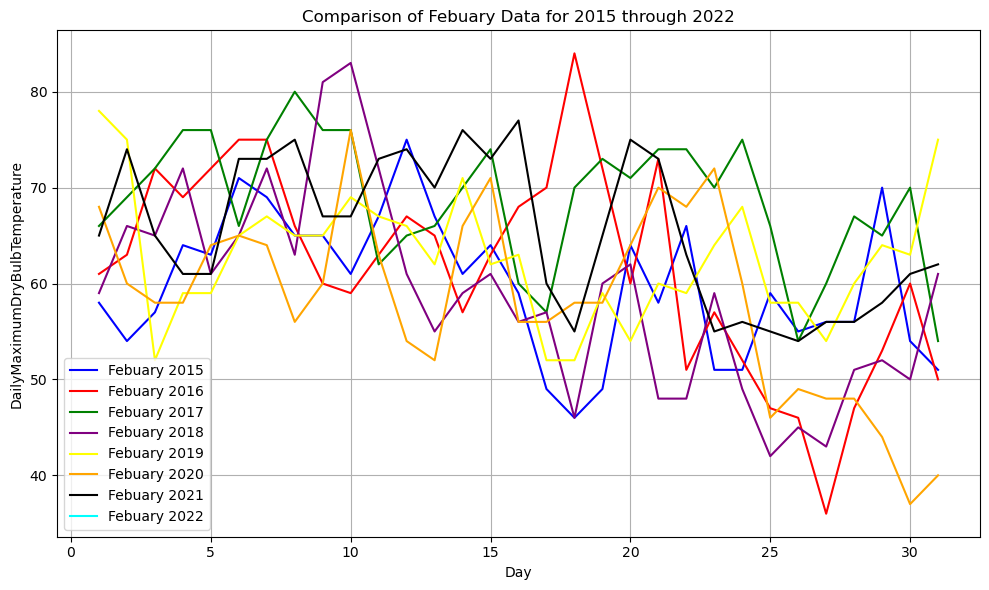

In [544]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(oct_2015['Day'], oct_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(oct_2016['Day'], oct_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(oct_2017['Day'], oct_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(oct_2018['Day'], oct_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(oct_2019['Day'], oct_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(oct_2020['Day'], oct_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(oct_2021['Day'], oct_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(oct_2022['Day'], oct_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [545]:
#November
df_nov2015 = df_2015.loc[df_2015["Month"] ==11]
nov_2015 = df_nov2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [546]:
df_nov2016 = df_2016.loc[df_2016["Month"] ==11]
nov_2016 = df_nov2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [547]:
df_nov2017 = df_2017.loc[df_2017["Month"] ==11]
nov_2017 = df_nov2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [548]:
df_nov2018 = df_2018.loc[df_2018["Month"] ==11]
nov_2018 = df_nov2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [549]:
df_nov2019 = df_2019.loc[df_2019["Month"] ==11]
nov_2019 = df_nov2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [550]:
df_nov2020 = df_2020.loc[df_2020["Month"] ==11]
nov_2020 = df_nov2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [551]:
df_nov2021 = df_2021.loc[df_2021["Month"] ==11]
nov_2021 = df_nov2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [552]:
df_nov2022 = df_2022.loc[df_2022["Month"] ==11]
nov_2022 = df_nov2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

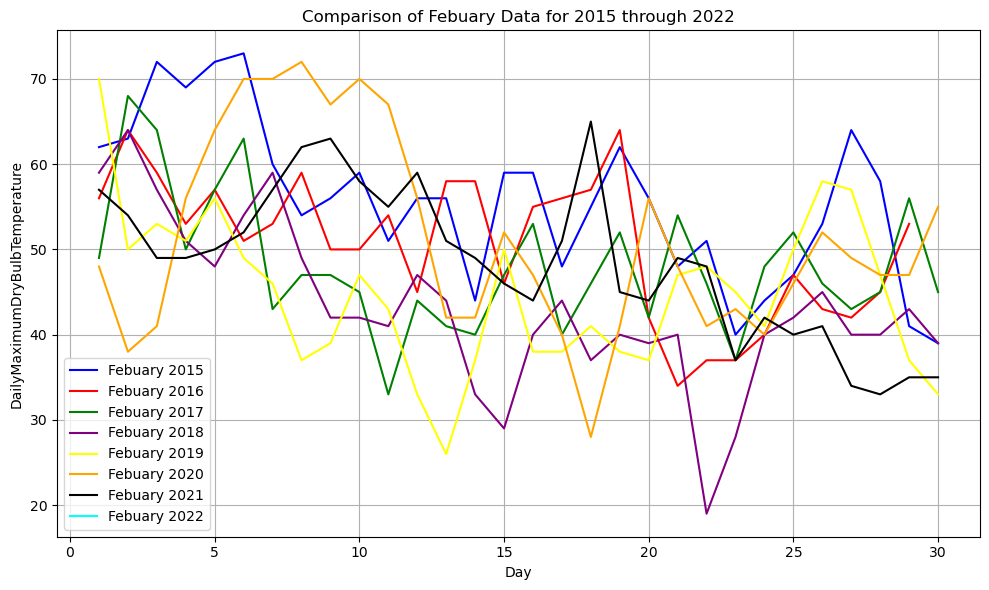

In [553]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(nov_2015['Day'], nov_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(nov_2016['Day'], nov_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(nov_2017['Day'], nov_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(nov_2018['Day'], nov_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(nov_2019['Day'], nov_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(nov_2020['Day'], nov_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(nov_2021['Day'], nov_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(nov_2022['Day'], nov_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [554]:
#December
df_dec2015 = df_2015.loc[df_2015["Month"] ==12]
dec_2015 = df_dec2015[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [555]:
df_dec2016 = df_2016.loc[df_2016["Month"] ==12]
dec_2016 = df_dec2016[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [556]:
df_dec2017 = df_2017.loc[df_2017["Month"] ==12]
dec_2017 = df_dec2017[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [557]:
df_dec2018 = df_2018.loc[df_2018["Month"] ==12]
dec_2018 = df_dec2018[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [558]:
df_dec2019 = df_2019.loc[df_2019["Month"] ==12]
dec_2019 = df_dec2019[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [559]:
df_dec2020 = df_2020.loc[df_2020["Month"] ==12]
dec_2020 = df_dec2020[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [560]:
df_dec2021 = df_2021.loc[df_2021["Month"] ==12]
dec_2021 = df_dec2021[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

In [561]:
df_dec2022 = df_2022.loc[df_2022["Month"] ==12]
dec_2022 = df_dec2022[["DailyMaximumDryBulbTemperature", "Day", "Year"]]

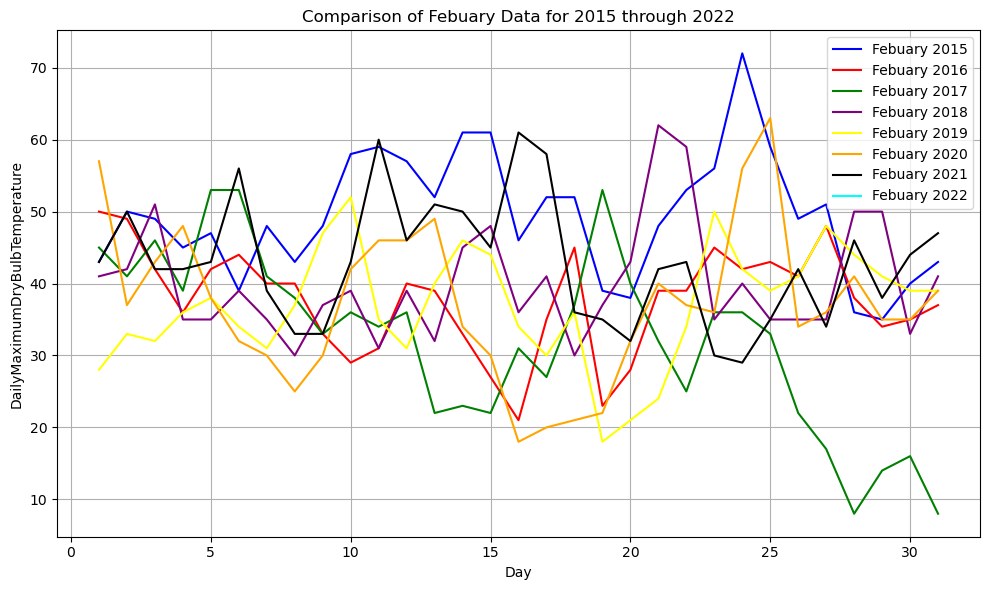

In [562]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for January 2015
plt.plot(dec_2015['Day'], dec_2015['DailyMaximumDryBulbTemperature'], label='Febuary 2015', color='blue')

# Plot the data for January 2016
plt.plot(dec_2016['Day'], dec_2016['DailyMaximumDryBulbTemperature'], label='Febuary 2016', color='red')

# Plot the data for January 2017
plt.plot(dec_2017['Day'], dec_2017['DailyMaximumDryBulbTemperature'], label='Febuary 2017', color='green')

#Plot the data for January 2018
plt.plot(dec_2018['Day'], dec_2018['DailyMaximumDryBulbTemperature'], label='Febuary 2018', color='purple')

#Plot the data for January 2018
plt.plot(dec_2019['Day'], dec_2019['DailyMaximumDryBulbTemperature'], label='Febuary 2019', color='yellow')

#Plot the data for January 2018
plt.plot(dec_2020['Day'], dec_2020['DailyMaximumDryBulbTemperature'], label='Febuary 2020', color='orange')

#Plot the data for January 2018
plt.plot(dec_2021['Day'], dec_2021['DailyMaximumDryBulbTemperature'], label='Febuary 2021', color='black')

#Plot the data for January 2018
plt.plot(dec_2022['Day'], dec_2022['DailyMaximumDryBulbTemperature'], label='Febuary 2022', color='cyan')


# Add title and axis labels
plt.title('Comparison of Febuary Data for 2015 through 2022')
plt.xlabel('Day')
plt.ylabel('DailyMaximumDryBulbTemperature')

# Add a legend to differentiate the lines
plt.legend()

# Display the grid for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [563]:
#Oumar starts here

In [564]:
jan1_avg = avg_groupby.iloc[0:8, 3:6]
jan1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
1     2015                       19.903226                       28.903226   
      2016                       27.967742                       36.000000   
      2017                       30.806452                       37.096774   
      2018                       23.548387                       31.741935   
      2019                       23.800000                       32.266667   
      2020                       32.032258                       39.838710   
      2021                       23.580645                       29.322581   
      2022                       19.935484                       29.032258   

            DailyMinimumDryBulbTemperature  
Month Year                                  
1     2015                       10.451613  
      2016                       19.483871  
      2017                       24.032258  
      2018                       14.774194  
      2019                       14.933333  
      2020                       23.741935  
      2021                       17.290323  
      2022                       10.451613

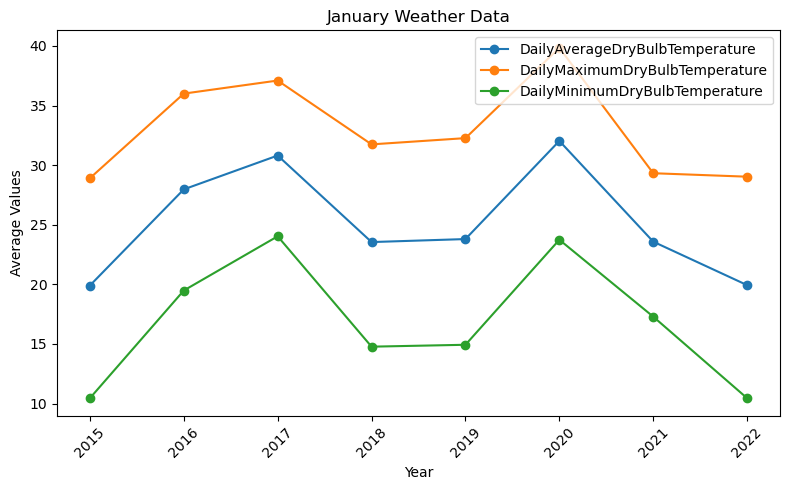

In [565]:
jan1_plot = jan1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in jan1_avg.index]
# Set the correct x-axis ticks and labels
jan1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
jan1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
jan1_plot.set_title('January Weather Data')
jan1_plot.set_xlabel('Year')
jan1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [566]:
feb1_avg = avg_groupby.iloc[8:15, 3:6]
feb1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
2     2016                       30.896552                       40.551724   
      2017                       33.111111                       42.000000   
      2018                       32.714286                       41.571429   
      2019                       27.785714                       35.392857   
      2020                       31.724138                       39.206897   
      2021                       23.964286                       30.500000   
      2022                       27.750000                       37.642857   

            DailyMinimumDryBulbTemperature  
Month Year                                  
2     2016                       20.620690  
      2017                       23.666667  
      2018                       23.285714  
      2019                       19.750000  
      2020                       23.862069  
      2021                       16.892857  
      2022                       17.321429

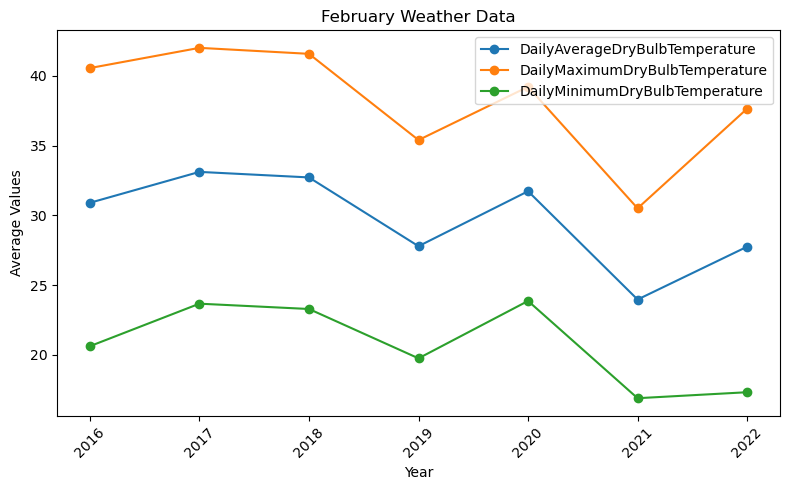

In [567]:
feb1_plot = feb1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in feb1_avg.index]
# Set the correct x-axis ticks and labels
feb1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
feb1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
feb1_plot.set_title('February Weather Data')
feb1_plot.set_xlabel('Year')
feb1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [568]:
mar1_avg = avg_groupby.iloc[15:23, 3:6]
mar1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
3     2015                       30.000000                       38.967742   
      2016                       43.000000                       52.935484   
      2017                       31.800000                       40.633333   
      2018                       34.322581                       40.838710   
      2019                       35.500000                       44.833333   
      2020                       42.516129                       51.806452   
      2021                       36.645161                       47.612903   
      2022                       37.516129                       47.193548   

            DailyMinimumDryBulbTemperature  
Month Year                                  
3     2015                       20.677419  
      2016                       32.516129  
      2017                       22.500000  
      2018                       27.322581  
      2019                       25.633333  
      2020                       32.741935  
      2021                       25.193548  
      2022                       27.387097

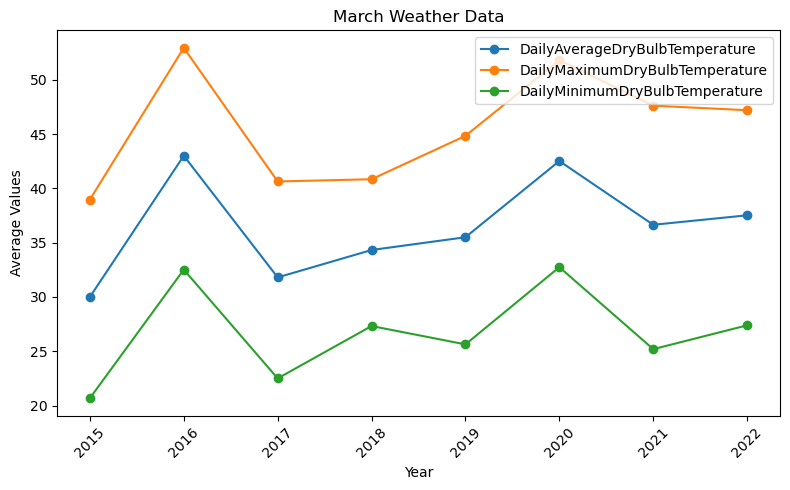

In [569]:
mar1_plot = mar1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in mar1_avg.index]
# Set the correct x-axis ticks and labels
mar1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
mar1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
mar1_plot.set_title('March Weather Data')
mar1_plot.set_xlabel('Year')
mar1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [570]:
apr1_avg = avg_groupby.iloc[23:31, 3:6]
apr1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
4     2015                       47.966667                       58.700000   
      2016                       46.100000                       57.166667   
      2017                       53.300000                       63.300000   
      2018                       41.366667                       50.633333   
      2019                       50.000000                       59.933333   
      2020                       46.933333                       56.100000   
      2021                       47.000000                       57.533333   
      2022                       48.033333                       58.366667   

            DailyMinimumDryBulbTemperature  
Month Year                                  
4     2015                       36.866667  
      2016                       34.733333  
      2017                       42.733333  
      2018                       31.566667  
      2019                       39.633333  
      2020                       37.166667  
      2021                       35.900000  
      2022                       37.266667

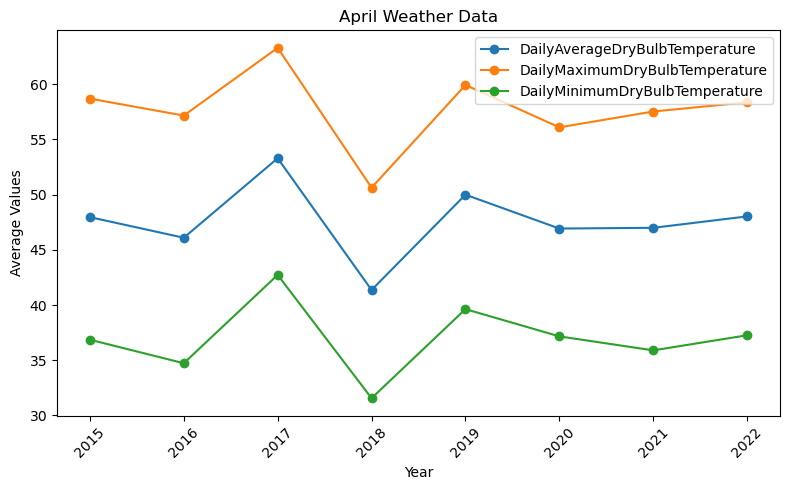

In [571]:
apr1_plot = apr1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in apr1_avg.index]
# Set the correct x-axis ticks and labels
apr1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
apr1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
apr1_plot.set_title('April Weather Data')
apr1_plot.set_xlabel('Year')
apr1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [572]:
may1_avg = avg_groupby.iloc[31:39, 3:6]
may1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
5     2015                       65.870968                       78.354839   
      2016                       59.741935                       70.225806   
      2017                       57.645161                       66.741935   
      2018                       64.548387                       75.483871   
      2019                       58.838710                       67.935484   
      2020                       60.032258                       71.129032   
      2021                       55.870968                       66.967742   
      2022                       63.451613                       75.064516   

            DailyMinimumDryBulbTemperature  
Month Year                                  
5     2015                       52.774194  
      2016                       48.709677  
      2017                       48.064516  
      2018                       53.032258  
      2019                       49.129032  
      2020                       48.483871  
      2021                       44.322581  
      2022                       51.451613

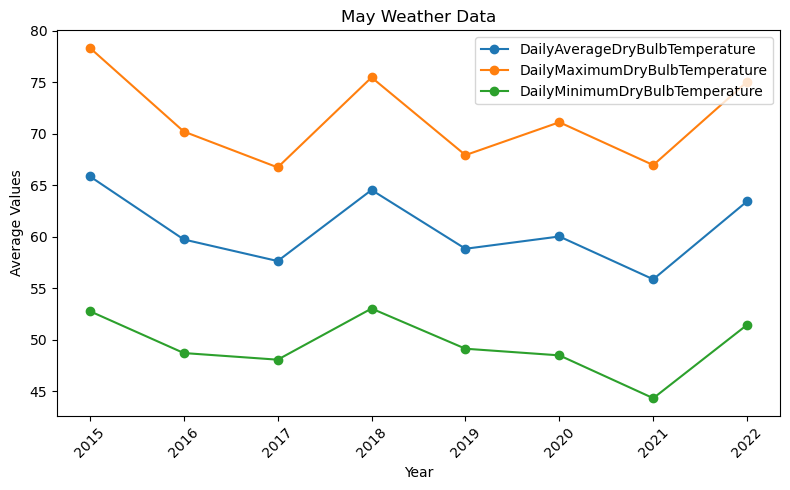

In [573]:
may1_plot = may1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in may1_avg.index]
# Set the correct x-axis ticks and labels
may1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
may1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
may1_plot.set_title('May Weather Data')
may1_plot.set_xlabel('Year')
may1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [574]:
june1_avg = avg_groupby.iloc[39:46, 3:6]
june1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
6     2015                       67.000000                       76.366667   
      2016                       68.500000                       79.933333   
      2017                       68.200000                       78.266667   
      2018                       68.172414                       79.000000   
      2019                       68.366667                       78.933333   
      2020                       71.033333                       82.733333   
      2021                       68.533333                       79.000000   

            DailyMinimumDryBulbTemperature  
Month Year                                  
6     2015                       57.233333  
      2016                       56.466667  
      2017                       57.633333  
      2018                       56.931034  
      2019                       57.066667  
      2020                       58.933333  
      2021                       57.433333

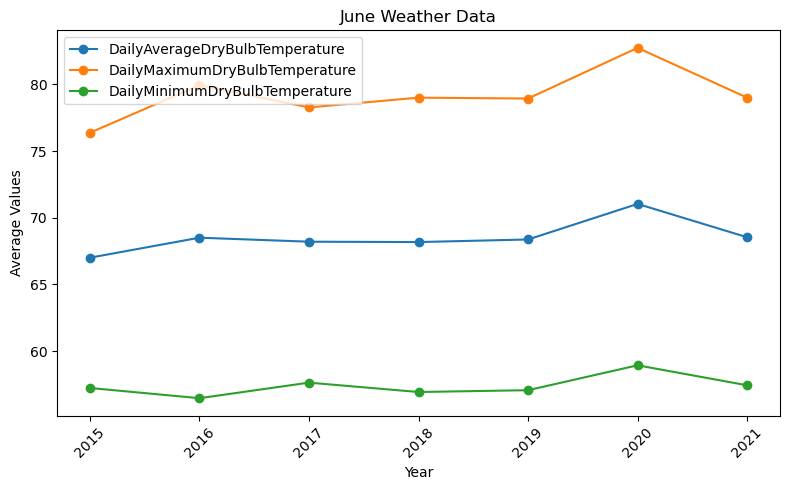

In [575]:
june1_plot = june1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in june1_avg.index]
# Set the correct x-axis ticks and labels
june1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
june1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
june1_plot.set_title('June Weather Data')
june1_plot.set_xlabel('Year')
june1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [576]:
july1_avg = avg_groupby.iloc[46:53, 3:6]
july1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
7     2015                       73.193548                       83.709677   
      2016                       74.000000                       84.666667   
      2017                       72.032258                       81.225806   
      2018                       76.966667                       87.433333   
      2019                       76.655172                       86.758621   
      2020                       76.161290                       86.322581   
      2021                       68.096774                       76.483871   

            DailyMinimumDryBulbTemperature  
Month Year                                  
7     2015                       62.322581  
      2016                       62.900000  
      2017                       62.258065  
      2018                       66.000000  
      2019                       65.965517  
      2020                       65.516129  
      2021                       59.193548

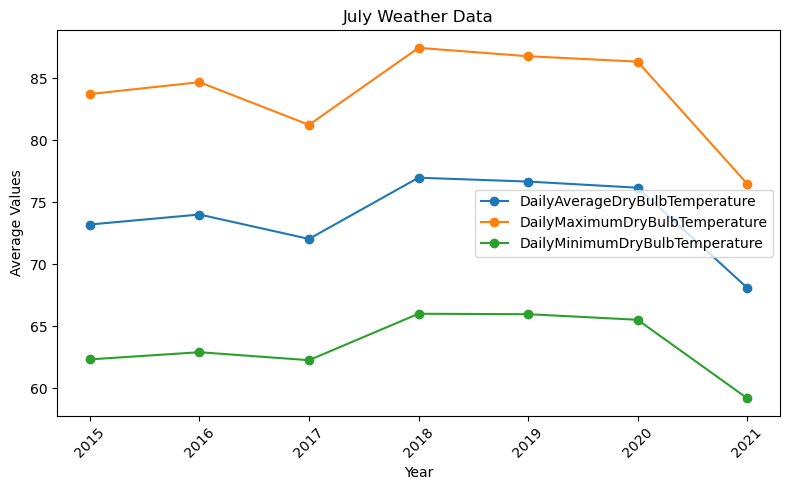

In [577]:
july1_plot = july1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in july1_avg.index]
# Set the correct x-axis ticks and labels
july1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
july1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
july1_plot.set_title('July Weather Data')
july1_plot.set_xlabel('Year')
july1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [578]:
aug1_avg = avg_groupby.iloc[53:60, 3:6]
aug1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
8     2015                       73.166667                       83.633333   
      2016                       74.161290                       84.032258   
      2017                       69.548387                       79.419355   
      2018                       75.387097                       83.709677   
      2019                       71.935484                       82.225806   
      2020                       69.064516                       79.096774   
      2021                       71.193548                       80.193548   

            DailyMinimumDryBulbTemperature  
Month Year                                  
8     2015                       62.166667  
      2016                       63.741935  
      2017                       59.064516  
      2018                       66.548387  
      2019                       61.161290  
      2020                       58.451613  
      2021                       61.612903

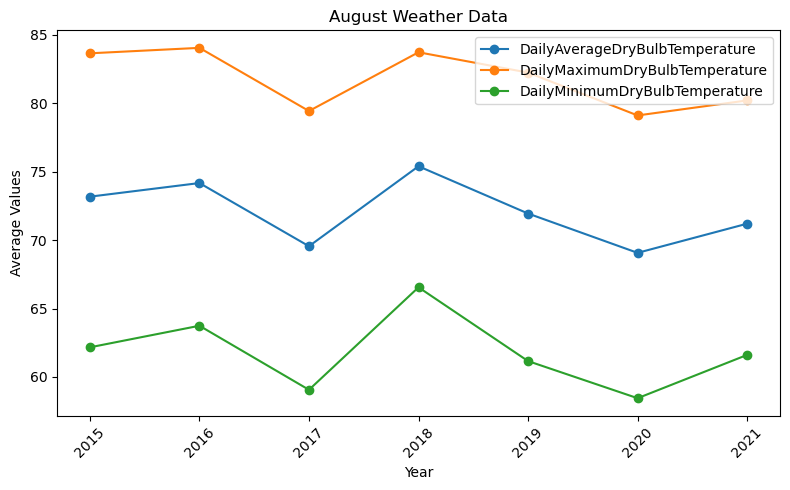

In [579]:
aug1_plot = aug1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in aug1_avg.index]
# Set the correct x-axis ticks and labels
aug1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
aug1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
aug1_plot.set_title('August Weather Data')
aug1_plot.set_xlabel('Year')
aug1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [580]:
sept1_avg = avg_groupby.iloc[60:67, 3:6]
sept1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
9     2015                       68.833333                       79.933333   
      2016                       66.400000                       77.600000   
      2017                       65.900000                       76.566667   
      2018                       67.466667                       75.500000   
      2019                       63.966667                       75.200000   
      2020                       59.966667                       70.366667   
      2021                       62.333333                       71.733333   

            DailyMinimumDryBulbTemperature  
Month Year                                  
9     2015                       57.200000  
      2016                       54.600000  
      2017                       54.633333  
      2018                       58.900000  
      2019                       52.400000  
      2020                       49.100000  
      2021                       52.600000

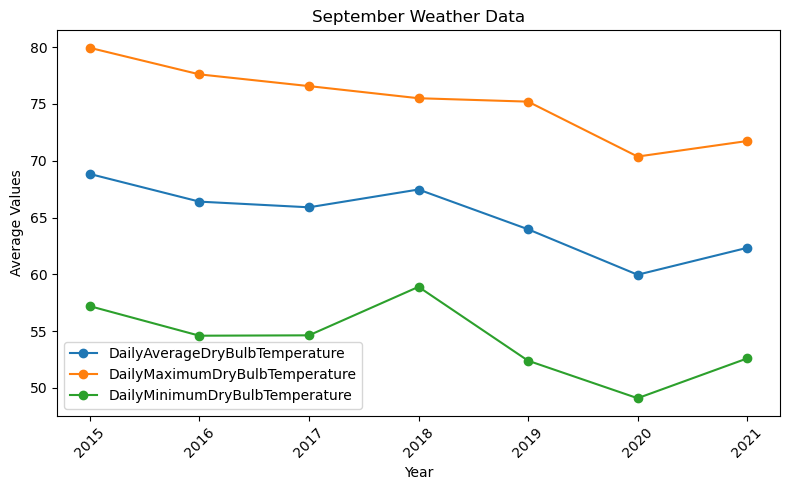

In [581]:
sept1_plot = sept1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in sept1_avg.index]
# Set the correct x-axis ticks and labels
sept1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
sept1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
sept1_plot.set_title('September Weather Data')
sept1_plot.set_xlabel('Year')
sept1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [582]:
oct1_avg = avg_groupby.iloc[67:74, 3:6]
oct1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
10    2015                       50.032258                       59.838710   
      2016                       52.800000                       61.666667   
      2017                       58.000000                       68.677419   
      2018                       50.967742                       58.838710   
      2019                       53.774194                       62.741935   
      2020                       49.096774                       58.354839   
      2021                       57.032258                       65.419355   

            DailyMinimumDryBulbTemperature  
Month Year                                  
10    2015                       39.709677  
      2016                       43.366667  
      2017                       46.903226  
      2018                       42.645161  
      2019                       44.419355  
      2020                       39.451613  
      2021                       48.193548

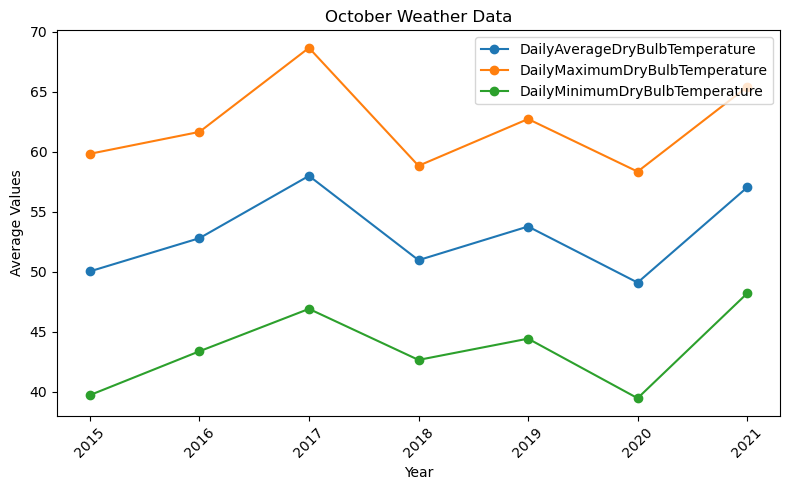

In [583]:
oct1_plot = oct1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in oct1_avg.index]
# Set the correct x-axis ticks and labels
oct1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
oct1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
oct1_plot.set_title('October Weather Data')
oct1_plot.set_xlabel('Year')
oct1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [584]:
nov1_avg = avg_groupby.iloc[74:81, 3:6]
nov1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
11    2015                       45.833333                       55.700000   
      2016                       41.413793                       50.517241   
      2017                       39.466667                       48.100000   
      2018                       37.200000                       43.166667   
      2019                       36.933333                       44.733333   
      2020                       41.266667                       51.166667   
      2021                       39.066667                       48.466667   

            DailyMinimumDryBulbTemperature  
Month Year                                  
11    2015                       35.366667  
      2016                       31.862069  
      2017                       30.233333  
      2018                       30.766667  
      2019                       28.700000  
      2020                       30.900000  
      2021                       29.100000

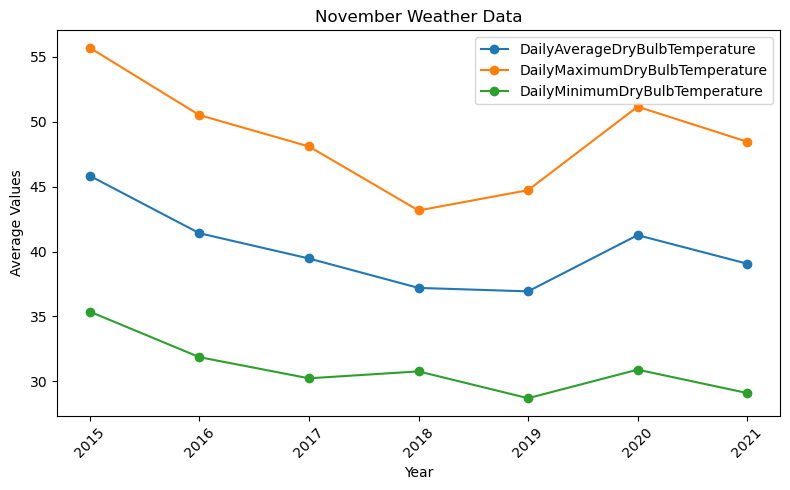

In [585]:
nov1_plot = nov1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in nov1_avg.index]
# Set the correct x-axis ticks and labels
nov1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
nov1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
nov1_plot.set_title('November Weather Data')
nov1_plot.set_xlabel('Year')
nov1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [586]:
dec1_avg = avg_groupby.iloc[81:88, 3:8]
dec1_avg

DailyAverageDryBulbTemperature  DailyMaximumDryBulbTemperature  \
Month Year                                                                   
12    2015                       42.096774                       49.322581   
      2016                       30.580645                       37.677419   
      2017                       25.032258                       32.161290   
      2018                       32.612903                       40.032258   
      2019                       30.000000                       36.903226   
      2020                       30.193548                       37.161290   
      2021                       36.354839                       42.838710   

            DailyMinimumDryBulbTemperature  
Month Year                                  
12    2015                       34.290323  
      2016                       23.000000  
      2017                       17.483871  
      2018                       24.709677  
      2019                       22.677419  
      2020                       22.612903  
      2021                       29.387097

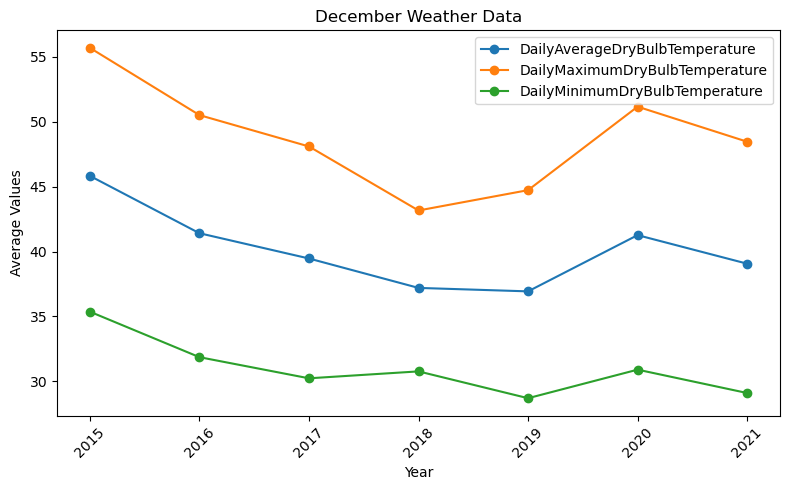

In [587]:
dec1_plot = nov1_avg.plot(kind='line', figsize=(8, 5), marker='o')

# Extract the year from the index
years = [str(index[1]) for index in dec1_avg.index]
# Set the correct x-axis ticks and labels
dec1_plot.set_xticks(range(len(years)))  # Set the correct number of ticks
dec1_plot.set_xticklabels(years, rotation=45)  # Set year labels and rotate for better readability

# Add title and labels
dec1_plot.set_title('December Weather Data')
dec1_plot.set_xlabel('Year')
dec1_plot.set_ylabel('Average Values')

# Ensure layout is adjusted to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()